<a href="https://colab.research.google.com/github/josmedinaca/mineria-diabetes/blob/main/Diabetes%20Health%20Indicators%20Dataset%20-%201st.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Universidad Nacional de Colombia
# Minería de Datos
**Diego Gutierrez y Johan Medina**



---



In [ ]:
# R
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [ ]:
# Python
import pandas as pd 
import numpy as np
from scipy.stats import trim_mean
from numpy import mean, absolute 

**Conjunto de Datos: Diabetes**

Diabetes Health Indicators Dataset


*   Diabetes Health Indicators Dataset 	https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset?select=diabetes_binary_5050split_health_indicators_BRFSS2015.csv
*    70.692 registros
*    22 variables, 1 es la clase
*    La clase indica si la persona no tiene diabetes o si por el contrario tiene diabetes o prediabetes  
*  La clase es: 0 o 1, 0 si la persona no tiene diabetes y 1 si tiene prediabetes o diabetes. 35346 registros de cada clase



Verificar si el dataset se ha cargado, mirando la pestaña de **archivos**. Si no, cargar el archivo *diabetes50.data*. Para ejecutarlo:

In [ ]:
# R
%%R
data <- read.csv("diabetes50.data", header=FALSE)
names(data) <- c("Diabetes_binary", "HighBP", "HighChol", "CholCheck", "BMI", "Smoker", "Stroke", "HeartDiseaseorAttack", "PhysActivity", "Fruits", "Veggies", "HvyAlcoholConsump", "AnyHealthcare", "NoDocbcCost", "GenHlth", "MentHlth", "PhysHlth", "DiffWalk", "Sex" ,"Age" , "Education", "Income")


In [ ]:
# Python
data = pd.read_csv("./diabetes50.data", names=["Diabetes_binary", "HighBP", "HighChol", "CholCheck", "BMI", "Smoker", "Stroke", "HeartDiseaseorAttack", "PhysActivity", "Fruits", "Veggies", "HvyAlcoholConsump", "AnyHealthcare", "NoDocbcCost", "GenHlth", "MentHlth", "PhysHlth", "DiffWalk", "Sex" ,"Age" , "Education", "Income"]) 
data1 = pd.read_csv("./diabetes50.data", names=["Diabetes_binary", "HighBP", "HighChol", "CholCheck", "BMI", "Smoker", "Stroke", "HeartDiseaseorAttack", "PhysActivity", "Fruits", "Veggies", "HvyAlcoholConsump", "AnyHealthcare", "NoDocbcCost", "GenHlth", "MentHlth", "PhysHlth", "DiffWalk", "Sex" ,"Age" , "Education", "Income"]) 

Ver el conjunto de datos:

In [ ]:
#Python
data

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


In [ ]:
#Python
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


**Frecuencia**

In [ ]:
# Lenguaje R
%%R
table(data$Diabetes_binary)


    0     1 
35346 35346 


In [ ]:
# Lenguaje R
%%R
table(data$HighBP)


    0     1 
30860 39832 


In [ ]:
# Lenguaje R
%%R
table(data$HighChol)


    0     1 
33529 37163 


In [ ]:
# Lenguaje R
%%R
table(data$CholCheck)


    0     1 
 1749 68943 


In [ ]:
# Lenguaje R
%%R
table(data$BMI)


  12   13   14   15   16   17   18   19   20   21   22   23   24   25   26   27 
   1    8    8   30   70  170  366  691 1256 2028 2778 3315 4392 4031 4975 6327 
  28   29   30   31   32   33   34   35   36   37   38   39   40   41   42   43 
4583 4219 4344 3753 3481 3159 2564 2107 1794 1607 1415 1189  970  701  686  665 
  44   45   46   47   48   49   50   51   52   53   54   55   56   57   58   59 
 456  373  359  272  236  195  195  122  111  109   57   79   50   37   44   25 
  60   61   62   63   64   65   66   67   68   69   70   71   72   73   74   75 
  29   20   18   20    9   11    9    8    7    4    5    9    9   12    1    9 
  76   77   78   79   80   81   82   83   84   85   86   87   89   92   95   98 
   2   18    1   17    1    9   11    1   13    1    1   13    4    9    4    4 


In [ ]:
# Lenguaje R
%%R
table(data$Smoker)


    0     1 
37094 33598 


In [ ]:
# Lenguaje R
%%R
table(data$Stroke)


    0     1 
66297  4395 


In [ ]:
# Lenguaje R
%%R
table(data$HeartDiseaseorAttack)


    0     1 
60243 10449 


In [ ]:
# Lenguaje R
%%R
table(data$PhysActivity)


    0     1 
20993 49699 


In [ ]:
# Lenguaje R
%%R
table(data$Fruits)


    0     1 
27443 43249 


In [ ]:
# Lenguaje R
%%R
table(data$Veggies)


    0     1 
14932 55760 


In [ ]:
# Lenguaje R
%%R
table(data$HvyAlcoholConsump)


    0     1 
67672  3020 


In [ ]:
# Lenguaje R
%%R
table(data$AnyHealthcare)


    0     1 
 3184 67508 


In [ ]:
# Lenguaje R
%%R
table(data$NoDocbcCost)


    0     1 
64053  6639 


In [ ]:
# Lenguaje R
%%R
table(data$GenHlth)


    1     2     3     4     5 
 8282 19872 23427 13303  5808 


In [ ]:
# Lenguaje R
%%R
table(data$MentHlth)


    0     1     2     3     4     5     6     7     8     9    10    11    12 
48091  2051  3267  1967   981  2519   288   825   198    28  1924     8   130 
   13    14    15    16    17    18    19    20    21    22    23    24    25 
   15   353  1767    28    18    42     7  1125    84    22    13    10   425 
   26    27    28    29    30 
   17    17    99    53  4320 


In [ ]:
# Lenguaje R
%%R
table(data$PhysHlth)


    0     1     2     3     4     5     6     7     8     9    10    11    12 
39915  2853  4102  2438  1376  2332   447  1326   276    55  1980    22   205 
   13    14    15    16    17    18    19    20    21    22    23    24    25 
   26   802  1913    50    35    50    10  1292   229    31    27    24   557 
   26    27    28    29    30 
   26    34   211    95  7953 


In [ ]:
# Lenguaje R
%%R
table(data$DiffWalk)


    0     1 
52826 17866 


In [ ]:
# Lenguaje R
%%R
table(data$Sex)


    0     1 
38386 32306 


In [ ]:
# Lenguaje R
%%R
table(data$Age)


    1     2     3     4     5     6     7     8     9    10    11    12    13 
  979  1396  2049  2793  3520  4648  6872  8603 10112 10856  8044  5394  5426 


In [ ]:
# Lenguaje R
%%R
table(data$Education)


    1     2     3     4     5     6 
   75  1647  3447 19473 20030 26020 


In [ ]:
# Lenguaje R
%%R
table(data$Income)


    1     2     3     4     5     6     7     8 
 3611  4498  5557  6658  8010 10287 11425 20646 


In [ ]:
#Python
data.groupby('BMI').size()

BMI
12.0     1
13.0     8
14.0     8
15.0    30
16.0    70
        ..
87.0    13
89.0     4
92.0     9
95.0     4
98.0     4
Length: 80, dtype: int64

**Frecuencias porcentuales:**

In [ ]:
#Python
fp = data.groupby('Diabetes_binary').size() / data.shape[0] 
print(fp)

Diabetes_binary
0.0    0.5
1.0    0.5
dtype: float64


In [ ]:
#Python
fp = data.groupby('HighBP').size() / data.shape[0] 
print(fp)

HighBP
0.0    0.436542
1.0    0.563458
dtype: float64


In [ ]:
#Python
fp = data.groupby('HighChol').size() / data.shape[0] 
print(fp)

HighChol
0.0    0.474297
1.0    0.525703
dtype: float64


In [ ]:
#Python
fp = data.groupby('CholCheck').size() / data.shape[0] 
print(fp)

CholCheck
0.0    0.024741
1.0    0.975259
dtype: float64


In [ ]:
#Python
fp = data.groupby('BMI').size() / data.shape[0] 
print(fp)

BMI
12.0    0.000014
13.0    0.000113
14.0    0.000113
15.0    0.000424
16.0    0.000990
          ...   
87.0    0.000184
89.0    0.000057
92.0    0.000127
95.0    0.000057
98.0    0.000057
Length: 80, dtype: float64


In [ ]:
#Python
fp = data.groupby('Smoker').size() / data.shape[0] 
print(fp)

Smoker
0.0    0.524727
1.0    0.475273
dtype: float64


In [ ]:
#Python
fp = data.groupby('Stroke').size() / data.shape[0] 
print(fp)

Stroke
0.0    0.937829
1.0    0.062171
dtype: float64


In [ ]:
#Python
fp = data.groupby('HeartDiseaseorAttack').size() / data.shape[0] 
print(fp)

HeartDiseaseorAttack
0.0    0.85219
1.0    0.14781
dtype: float64


In [ ]:
#Python
fp = data.groupby('PhysActivity').size() / data.shape[0] 
print(fp)

PhysActivity
0.0    0.296964
1.0    0.703036
dtype: float64


In [ ]:
#Python
fp = data.groupby('Fruits').size() / data.shape[0] 
print(fp)

Fruits
0.0    0.388205
1.0    0.611795
dtype: float64


In [ ]:
#Python
fp = data.groupby('Veggies').size() / data.shape[0] 
print(fp)

Veggies
0.0    0.211226
1.0    0.788774
dtype: float64


In [ ]:
#Python
fp = data.groupby('HvyAlcoholConsump').size() / data.shape[0] 
print(fp)

HvyAlcoholConsump
0.0    0.957279
1.0    0.042721
dtype: float64


In [ ]:
#Python
fp = data.groupby('AnyHealthcare').size() / data.shape[0] 
print(fp)

AnyHealthcare
0.0    0.04504
1.0    0.95496
dtype: float64


In [ ]:
#Python
fp = data.groupby('NoDocbcCost').size() / data.shape[0] 
print(fp)

NoDocbcCost
0.0    0.906086
1.0    0.093914
dtype: float64


In [ ]:
#Python
fp = data.groupby('GenHlth').size() / data.shape[0] 
print(fp)

GenHlth
1.0    0.117156
2.0    0.281107
3.0    0.331395
4.0    0.188183
5.0    0.082159
dtype: float64


In [ ]:
#Python
fp = data.groupby('MentHlth').size() / data.shape[0] 
print(fp)

MentHlth
0.0     0.680289
1.0     0.029013
2.0     0.046215
3.0     0.027825
4.0     0.013877
5.0     0.035633
6.0     0.004074
7.0     0.011670
8.0     0.002801
9.0     0.000396
10.0    0.027217
11.0    0.000113
12.0    0.001839
13.0    0.000212
14.0    0.004993
15.0    0.024996
16.0    0.000396
17.0    0.000255
18.0    0.000594
19.0    0.000099
20.0    0.015914
21.0    0.001188
22.0    0.000311
23.0    0.000184
24.0    0.000141
25.0    0.006012
26.0    0.000240
27.0    0.000240
28.0    0.001400
29.0    0.000750
30.0    0.061110
dtype: float64


In [ ]:
#Python
fp = data.groupby('PhysHlth').size() / data.shape[0] 
print(fp)

PhysHlth
0.0     0.564632
1.0     0.040358
2.0     0.058026
3.0     0.034488
4.0     0.019465
5.0     0.032988
6.0     0.006323
7.0     0.018757
8.0     0.003904
9.0     0.000778
10.0    0.028009
11.0    0.000311
12.0    0.002900
13.0    0.000368
14.0    0.011345
15.0    0.027061
16.0    0.000707
17.0    0.000495
18.0    0.000707
19.0    0.000141
20.0    0.018276
21.0    0.003239
22.0    0.000439
23.0    0.000382
24.0    0.000340
25.0    0.007879
26.0    0.000368
27.0    0.000481
28.0    0.002985
29.0    0.001344
30.0    0.112502
dtype: float64


In [ ]:
#Python
fp = data.groupby('DiffWalk').size() / data.shape[0] 
print(fp)

DiffWalk
0.0    0.74727
1.0    0.25273
dtype: float64


In [ ]:
#Python
fp = data.groupby('Sex').size() / data.shape[0] 
print(fp)

Sex
0.0    0.543003
1.0    0.456997
dtype: float64


In [ ]:
#Python
fp = data.groupby('Age').size() / data.shape[0] 
print(fp)

Age
1.0     0.013849
2.0     0.019748
3.0     0.028985
4.0     0.039509
5.0     0.049793
6.0     0.065750
7.0     0.097210
8.0     0.121697
9.0     0.143043
10.0    0.153568
11.0    0.113789
12.0    0.076303
13.0    0.076756
dtype: float64


In [ ]:
#Python
fp = data.groupby('Education').size() / data.shape[0] 
print(fp)

Education
1.0    0.001061
2.0    0.023298
3.0    0.048761
4.0    0.275463
5.0    0.283342
6.0    0.368076
dtype: float64


In [ ]:
#Python
fp = data.groupby('Income').size() / data.shape[0] 
print(fp)

Income
1.0    0.051081
2.0    0.063628
3.0    0.078609
4.0    0.094183
5.0    0.113308
6.0    0.145519
7.0    0.161617
8.0    0.292056
dtype: float64


## **Medidas de centralidad:**

**Media**

In [ ]:
#Python
mean = data.mean(axis = 0) 
mean

Diabetes_binary          0.500000
HighBP                   0.563458
HighChol                 0.525703
CholCheck                0.975259
BMI                     29.856985
Smoker                   0.475273
Stroke                   0.062171
HeartDiseaseorAttack     0.147810
PhysActivity             0.703036
Fruits                   0.611795
Veggies                  0.788774
HvyAlcoholConsump        0.042721
AnyHealthcare            0.954960
NoDocbcCost              0.093914
GenHlth                  2.837082
MentHlth                 3.752037
PhysHlth                 5.810417
DiffWalk                 0.252730
Sex                      0.456997
Age                      8.584055
Education                4.920953
Income                   5.698311
dtype: float64

La **media robusta**, descartando el 10% de los valores extremos:


In [ ]:
#Python
trim_mean(data['Income'], 0.10)



5.936733033914488

**Mediana**


In [ ]:
#Python
data.median(axis = 0) 

Diabetes_binary          0.5
HighBP                   1.0
HighChol                 1.0
CholCheck                1.0
BMI                     29.0
Smoker                   0.0
Stroke                   0.0
HeartDiseaseorAttack     0.0
PhysActivity             1.0
Fruits                   1.0
Veggies                  1.0
HvyAlcoholConsump        0.0
AnyHealthcare            1.0
NoDocbcCost              0.0
GenHlth                  3.0
MentHlth                 0.0
PhysHlth                 0.0
DiffWalk                 0.0
Sex                      0.0
Age                      9.0
Education                5.0
Income                   6.0
dtype: float64

### **Percentiles**


*   El k-esimo percentil de una variable numérica es un valor tal que el k\% de las observaciones se encuentran debajo del percentil y el (100 − k) \% se encuentran sobre este valor.

*   En estadística se usan los \textbf{cuantiles} que son equivalentes a los percentiles expresados en fracciones en vez de porcentajes.


In [ ]:
# Lenguaje R 
%%R
quantile(data$Income ,seq(0,1,0.01))

  0%   1%   2%   3%   4%   5%   6%   7%   8%   9%  10%  11%  12%  13%  14%  15% 
   1    1    1    1    1    1    2    2    2    2    2    2    3    3    3    3 
 16%  17%  18%  19%  20%  21%  22%  23%  24%  25%  26%  27%  28%  29%  30%  31% 
   3    3    3    3    4    4    4    4    4    4    4    4    4    5    5    5 
 32%  33%  34%  35%  36%  37%  38%  39%  40%  41%  42%  43%  44%  45%  46%  47% 
   5    5    5    5    5    5    5    5    5    6    6    6    6    6    6    6 
 48%  49%  50%  51%  52%  53%  54%  55%  56%  57%  58%  59%  60%  61%  62%  63% 
   6    6    6    6    6    6    6    7    7    7    7    7    7    7    7    7 
 64%  65%  66%  67%  68%  69%  70%  71%  72%  73%  74%  75%  76%  77%  78%  79% 
   7    7    7    7    7    7    7    8    8    8    8    8    8    8    8    8 
 80%  81%  82%  83%  84%  85%  86%  87%  88%  89%  90%  91%  92%  93%  94%  95% 
   8    8    8    8    8    8    8    8    8    8    8    8    8    8    8    8 
 96%  97%  98%  99% 100% 
  

In [ ]:
# Lenguaje R 
%%R
quantile(data$Diabetes_binary ,seq(0,1,0.01))

  0%   1%   2%   3%   4%   5%   6%   7%   8%   9%  10%  11%  12%  13%  14%  15% 
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 
 16%  17%  18%  19%  20%  21%  22%  23%  24%  25%  26%  27%  28%  29%  30%  31% 
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 
 32%  33%  34%  35%  36%  37%  38%  39%  40%  41%  42%  43%  44%  45%  46%  47% 
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 
 48%  49%  50%  51%  52%  53%  54%  55%  56%  57%  58%  59%  60%  61%  62%  63% 
 0.0  0.0  0.5  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0 
 64%  65%  66%  67%  68%  69%  70%  71%  72%  73%  74%  75%  76%  77%  78%  79% 
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0 
 80%  81%  82%  83%  84%  85%  86%  87%  88%  89%  90%  91%  92%  93%  94%  95% 
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0 
 96%  97%  98%  99% 100% 
 1

In [ ]:
# Lenguaje R 
%%R
quantile(data$HighBP ,seq(0,1,0.01))

  0%   1%   2%   3%   4%   5%   6%   7%   8%   9%  10%  11%  12%  13%  14%  15% 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 16%  17%  18%  19%  20%  21%  22%  23%  24%  25%  26%  27%  28%  29%  30%  31% 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 32%  33%  34%  35%  36%  37%  38%  39%  40%  41%  42%  43%  44%  45%  46%  47% 
   0    0    0    0    0    0    0    0    0    0    0    0    1    1    1    1 
 48%  49%  50%  51%  52%  53%  54%  55%  56%  57%  58%  59%  60%  61%  62%  63% 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
 64%  65%  66%  67%  68%  69%  70%  71%  72%  73%  74%  75%  76%  77%  78%  79% 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
 80%  81%  82%  83%  84%  85%  86%  87%  88%  89%  90%  91%  92%  93%  94%  95% 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
 96%  97%  98%  99% 100% 
  

In [ ]:
# Lenguaje R 
%%R
quantile(data$HighChol ,seq(0,1,0.01))

  0%   1%   2%   3%   4%   5%   6%   7%   8%   9%  10%  11%  12%  13%  14%  15% 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 16%  17%  18%  19%  20%  21%  22%  23%  24%  25%  26%  27%  28%  29%  30%  31% 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 32%  33%  34%  35%  36%  37%  38%  39%  40%  41%  42%  43%  44%  45%  46%  47% 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 48%  49%  50%  51%  52%  53%  54%  55%  56%  57%  58%  59%  60%  61%  62%  63% 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
 64%  65%  66%  67%  68%  69%  70%  71%  72%  73%  74%  75%  76%  77%  78%  79% 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
 80%  81%  82%  83%  84%  85%  86%  87%  88%  89%  90%  91%  92%  93%  94%  95% 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
 96%  97%  98%  99% 100% 
  

In [ ]:
# Lenguaje R 
%%R
quantile(data$CholCheck ,seq(0,1,0.01))

  0%   1%   2%   3%   4%   5%   6%   7%   8%   9%  10%  11%  12%  13%  14%  15% 
   0    0    0    1    1    1    1    1    1    1    1    1    1    1    1    1 
 16%  17%  18%  19%  20%  21%  22%  23%  24%  25%  26%  27%  28%  29%  30%  31% 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
 32%  33%  34%  35%  36%  37%  38%  39%  40%  41%  42%  43%  44%  45%  46%  47% 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
 48%  49%  50%  51%  52%  53%  54%  55%  56%  57%  58%  59%  60%  61%  62%  63% 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
 64%  65%  66%  67%  68%  69%  70%  71%  72%  73%  74%  75%  76%  77%  78%  79% 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
 80%  81%  82%  83%  84%  85%  86%  87%  88%  89%  90%  91%  92%  93%  94%  95% 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
 96%  97%  98%  99% 100% 
  

In [ ]:
# Lenguaje R 
%%R
quantile(data$BMI ,seq(0,1,0.01))

  0%   1%   2%   3%   4%   5%   6%   7%   8%   9%  10%  11%  12%  13%  14%  15% 
  12   19   20   20   21   21   21   22   22   22   22   23   23   23   23   23 
 16%  17%  18%  19%  20%  21%  22%  23%  24%  25%  26%  27%  28%  29%  30%  31% 
  24   24   24   24   24   24   25   25   25   25   25   25   26   26   26   26 
 32%  33%  34%  35%  36%  37%  38%  39%  40%  41%  42%  43%  44%  45%  46%  47% 
  26   26   26   27   27   27   27   27   27   27   27   27   28   28   28   28 
 48%  49%  50%  51%  52%  53%  54%  55%  56%  57%  58%  59%  60%  61%  62%  63% 
  28   28   29   29   29   29   29   29   30   30   30   30   30   30   31   31 
 64%  65%  66%  67%  68%  69%  70%  71%  72%  73%  74%  75%  76%  77%  78%  79% 
  31   31   31   32   32   32   32   32   33   33   33   33   33   34   34   34 
 80%  81%  82%  83%  84%  85%  86%  87%  88%  89%  90%  91%  92%  93%  94%  95% 
  35   35   35   36   36   36   37   37   38   38   39   39   40   41   42   43 
 96%  97%  98%  99% 100% 
  

In [ ]:
# Lenguaje R 
%%R
quantile(data$Smoker ,seq(0,1,0.01))

  0%   1%   2%   3%   4%   5%   6%   7%   8%   9%  10%  11%  12%  13%  14%  15% 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 16%  17%  18%  19%  20%  21%  22%  23%  24%  25%  26%  27%  28%  29%  30%  31% 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 32%  33%  34%  35%  36%  37%  38%  39%  40%  41%  42%  43%  44%  45%  46%  47% 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 48%  49%  50%  51%  52%  53%  54%  55%  56%  57%  58%  59%  60%  61%  62%  63% 
   0    0    0    0    0    1    1    1    1    1    1    1    1    1    1    1 
 64%  65%  66%  67%  68%  69%  70%  71%  72%  73%  74%  75%  76%  77%  78%  79% 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
 80%  81%  82%  83%  84%  85%  86%  87%  88%  89%  90%  91%  92%  93%  94%  95% 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
 96%  97%  98%  99% 100% 
  

In [ ]:
# Lenguaje R 
%%R
quantile(data$Stroke ,seq(0,1,0.01))

  0%   1%   2%   3%   4%   5%   6%   7%   8%   9%  10%  11%  12%  13%  14%  15% 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 16%  17%  18%  19%  20%  21%  22%  23%  24%  25%  26%  27%  28%  29%  30%  31% 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 32%  33%  34%  35%  36%  37%  38%  39%  40%  41%  42%  43%  44%  45%  46%  47% 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 48%  49%  50%  51%  52%  53%  54%  55%  56%  57%  58%  59%  60%  61%  62%  63% 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 64%  65%  66%  67%  68%  69%  70%  71%  72%  73%  74%  75%  76%  77%  78%  79% 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 80%  81%  82%  83%  84%  85%  86%  87%  88%  89%  90%  91%  92%  93%  94%  95% 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    1    1 
 96%  97%  98%  99% 100% 
  

In [ ]:
# Lenguaje R 
%%R
quantile(data$HeartDiseaseorAttack ,seq(0,1,0.01))

  0%   1%   2%   3%   4%   5%   6%   7%   8%   9%  10%  11%  12%  13%  14%  15% 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 16%  17%  18%  19%  20%  21%  22%  23%  24%  25%  26%  27%  28%  29%  30%  31% 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 32%  33%  34%  35%  36%  37%  38%  39%  40%  41%  42%  43%  44%  45%  46%  47% 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 48%  49%  50%  51%  52%  53%  54%  55%  56%  57%  58%  59%  60%  61%  62%  63% 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 64%  65%  66%  67%  68%  69%  70%  71%  72%  73%  74%  75%  76%  77%  78%  79% 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 80%  81%  82%  83%  84%  85%  86%  87%  88%  89%  90%  91%  92%  93%  94%  95% 
   0    0    0    0    0    0    1    1    1    1    1    1    1    1    1    1 
 96%  97%  98%  99% 100% 
  

In [ ]:
# Lenguaje R 
%%R
quantile(data$PhysActivity ,seq(0,1,0.01))

  0%   1%   2%   3%   4%   5%   6%   7%   8%   9%  10%  11%  12%  13%  14%  15% 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 16%  17%  18%  19%  20%  21%  22%  23%  24%  25%  26%  27%  28%  29%  30%  31% 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    1    1 
 32%  33%  34%  35%  36%  37%  38%  39%  40%  41%  42%  43%  44%  45%  46%  47% 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
 48%  49%  50%  51%  52%  53%  54%  55%  56%  57%  58%  59%  60%  61%  62%  63% 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
 64%  65%  66%  67%  68%  69%  70%  71%  72%  73%  74%  75%  76%  77%  78%  79% 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
 80%  81%  82%  83%  84%  85%  86%  87%  88%  89%  90%  91%  92%  93%  94%  95% 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
 96%  97%  98%  99% 100% 
  

In [ ]:
# Lenguaje R 
%%R
quantile(data$Fruits ,seq(0,1,0.01))

  0%   1%   2%   3%   4%   5%   6%   7%   8%   9%  10%  11%  12%  13%  14%  15% 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 16%  17%  18%  19%  20%  21%  22%  23%  24%  25%  26%  27%  28%  29%  30%  31% 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 32%  33%  34%  35%  36%  37%  38%  39%  40%  41%  42%  43%  44%  45%  46%  47% 
   0    0    0    0    0    0    0    1    1    1    1    1    1    1    1    1 
 48%  49%  50%  51%  52%  53%  54%  55%  56%  57%  58%  59%  60%  61%  62%  63% 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
 64%  65%  66%  67%  68%  69%  70%  71%  72%  73%  74%  75%  76%  77%  78%  79% 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
 80%  81%  82%  83%  84%  85%  86%  87%  88%  89%  90%  91%  92%  93%  94%  95% 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
 96%  97%  98%  99% 100% 
  

In [ ]:
# Lenguaje R 
%%R
quantile(data$Veggies ,seq(0,1,0.01))

  0%   1%   2%   3%   4%   5%   6%   7%   8%   9%  10%  11%  12%  13%  14%  15% 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 16%  17%  18%  19%  20%  21%  22%  23%  24%  25%  26%  27%  28%  29%  30%  31% 
   0    0    0    0    0    0    1    1    1    1    1    1    1    1    1    1 
 32%  33%  34%  35%  36%  37%  38%  39%  40%  41%  42%  43%  44%  45%  46%  47% 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
 48%  49%  50%  51%  52%  53%  54%  55%  56%  57%  58%  59%  60%  61%  62%  63% 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
 64%  65%  66%  67%  68%  69%  70%  71%  72%  73%  74%  75%  76%  77%  78%  79% 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
 80%  81%  82%  83%  84%  85%  86%  87%  88%  89%  90%  91%  92%  93%  94%  95% 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
 96%  97%  98%  99% 100% 
  

In [ ]:
# Lenguaje R 
%%R
quantile(data$HvyAlcoholConsump ,seq(0,1,0.01))

  0%   1%   2%   3%   4%   5%   6%   7%   8%   9%  10%  11%  12%  13%  14%  15% 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 16%  17%  18%  19%  20%  21%  22%  23%  24%  25%  26%  27%  28%  29%  30%  31% 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 32%  33%  34%  35%  36%  37%  38%  39%  40%  41%  42%  43%  44%  45%  46%  47% 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 48%  49%  50%  51%  52%  53%  54%  55%  56%  57%  58%  59%  60%  61%  62%  63% 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 64%  65%  66%  67%  68%  69%  70%  71%  72%  73%  74%  75%  76%  77%  78%  79% 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 80%  81%  82%  83%  84%  85%  86%  87%  88%  89%  90%  91%  92%  93%  94%  95% 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 96%  97%  98%  99% 100% 
  

In [ ]:
# Lenguaje R 
%%R
quantile(data$AnyHealthcare ,seq(0,1,0.01))

  0%   1%   2%   3%   4%   5%   6%   7%   8%   9%  10%  11%  12%  13%  14%  15% 
   0    0    0    0    0    1    1    1    1    1    1    1    1    1    1    1 
 16%  17%  18%  19%  20%  21%  22%  23%  24%  25%  26%  27%  28%  29%  30%  31% 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
 32%  33%  34%  35%  36%  37%  38%  39%  40%  41%  42%  43%  44%  45%  46%  47% 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
 48%  49%  50%  51%  52%  53%  54%  55%  56%  57%  58%  59%  60%  61%  62%  63% 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
 64%  65%  66%  67%  68%  69%  70%  71%  72%  73%  74%  75%  76%  77%  78%  79% 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
 80%  81%  82%  83%  84%  85%  86%  87%  88%  89%  90%  91%  92%  93%  94%  95% 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
 96%  97%  98%  99% 100% 
  

In [ ]:
# Lenguaje R 
%%R
quantile(data$NoDocbcCost ,seq(0,1,0.01))

  0%   1%   2%   3%   4%   5%   6%   7%   8%   9%  10%  11%  12%  13%  14%  15% 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 16%  17%  18%  19%  20%  21%  22%  23%  24%  25%  26%  27%  28%  29%  30%  31% 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 32%  33%  34%  35%  36%  37%  38%  39%  40%  41%  42%  43%  44%  45%  46%  47% 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 48%  49%  50%  51%  52%  53%  54%  55%  56%  57%  58%  59%  60%  61%  62%  63% 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 64%  65%  66%  67%  68%  69%  70%  71%  72%  73%  74%  75%  76%  77%  78%  79% 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 80%  81%  82%  83%  84%  85%  86%  87%  88%  89%  90%  91%  92%  93%  94%  95% 
   0    0    0    0    0    0    0    0    0    0    0    1    1    1    1    1 
 96%  97%  98%  99% 100% 
  

In [ ]:
# Lenguaje R 
%%R
quantile(data$GenHlth ,seq(0,1,0.01))

  0%   1%   2%   3%   4%   5%   6%   7%   8%   9%  10%  11%  12%  13%  14%  15% 
   1    1    1    1    1    1    1    1    1    1    1    1    2    2    2    2 
 16%  17%  18%  19%  20%  21%  22%  23%  24%  25%  26%  27%  28%  29%  30%  31% 
   2    2    2    2    2    2    2    2    2    2    2    2    2    2    2    2 
 32%  33%  34%  35%  36%  37%  38%  39%  40%  41%  42%  43%  44%  45%  46%  47% 
   2    2    2    2    2    2    2    2    3    3    3    3    3    3    3    3 
 48%  49%  50%  51%  52%  53%  54%  55%  56%  57%  58%  59%  60%  61%  62%  63% 
   3    3    3    3    3    3    3    3    3    3    3    3    3    3    3    3 
 64%  65%  66%  67%  68%  69%  70%  71%  72%  73%  74%  75%  76%  77%  78%  79% 
   3    3    3    3    3    3    3    3    3    4    4    4    4    4    4    4 
 80%  81%  82%  83%  84%  85%  86%  87%  88%  89%  90%  91%  92%  93%  94%  95% 
   4    4    4    4    4    4    4    4    4    4    4    4    5    5    5    5 
 96%  97%  98%  99% 100% 
  

In [ ]:
# Lenguaje R 
%%R
quantile(data$MentHlth ,seq(0,1,0.01))

  0%   1%   2%   3%   4%   5%   6%   7%   8%   9%  10%  11%  12%  13%  14%  15% 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 16%  17%  18%  19%  20%  21%  22%  23%  24%  25%  26%  27%  28%  29%  30%  31% 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 32%  33%  34%  35%  36%  37%  38%  39%  40%  41%  42%  43%  44%  45%  46%  47% 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 48%  49%  50%  51%  52%  53%  54%  55%  56%  57%  58%  59%  60%  61%  62%  63% 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 64%  65%  66%  67%  68%  69%  70%  71%  72%  73%  74%  75%  76%  77%  78%  79% 
   0    0    0    0    0    1    1    2    2    2    2    2    3    3    3    4 
 80%  81%  82%  83%  84%  85%  86%  87%  88%  89%  90%  91%  92%  93%  94%  95% 
   5    5    5    5    7    8   10   10   12   15   15   15   20   23   30   30 
 96%  97%  98%  99% 100% 
  

In [ ]:
# Lenguaje R 
%%R
quantile(data$PhysHlth ,seq(0,1,0.01))

  0%   1%   2%   3%   4%   5%   6%   7%   8%   9%  10%  11%  12%  13%  14%  15% 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 16%  17%  18%  19%  20%  21%  22%  23%  24%  25%  26%  27%  28%  29%  30%  31% 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 32%  33%  34%  35%  36%  37%  38%  39%  40%  41%  42%  43%  44%  45%  46%  47% 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 48%  49%  50%  51%  52%  53%  54%  55%  56%  57%  58%  59%  60%  61%  62%  63% 
   0    0    0    0    0    0    0    0    0    1    1    1    1    2    2    2 
 64%  65%  66%  67%  68%  69%  70%  71%  72%  73%  74%  75%  76%  77%  78%  79% 
   2    2    2    3    3    3    4    4    5    5    5    6    7    7   10   10 
 80%  81%  82%  83%  84%  85%  86%  87%  88%  89%  90%  91%  92%  93%  94%  95% 
  10   12   14   15   15   16   20   20   25   30   30   30   30   30   30   30 
 96%  97%  98%  99% 100% 
  

In [ ]:
# Lenguaje R 
%%R
quantile(data$DiffWalk ,seq(0,1,0.01))

  0%   1%   2%   3%   4%   5%   6%   7%   8%   9%  10%  11%  12%  13%  14%  15% 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 16%  17%  18%  19%  20%  21%  22%  23%  24%  25%  26%  27%  28%  29%  30%  31% 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 32%  33%  34%  35%  36%  37%  38%  39%  40%  41%  42%  43%  44%  45%  46%  47% 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 48%  49%  50%  51%  52%  53%  54%  55%  56%  57%  58%  59%  60%  61%  62%  63% 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 64%  65%  66%  67%  68%  69%  70%  71%  72%  73%  74%  75%  76%  77%  78%  79% 
   0    0    0    0    0    0    0    0    0    0    0    1    1    1    1    1 
 80%  81%  82%  83%  84%  85%  86%  87%  88%  89%  90%  91%  92%  93%  94%  95% 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
 96%  97%  98%  99% 100% 
  

In [ ]:
# Lenguaje R 
%%R
quantile(data$Sex ,seq(0,1,0.01))

  0%   1%   2%   3%   4%   5%   6%   7%   8%   9%  10%  11%  12%  13%  14%  15% 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 16%  17%  18%  19%  20%  21%  22%  23%  24%  25%  26%  27%  28%  29%  30%  31% 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 32%  33%  34%  35%  36%  37%  38%  39%  40%  41%  42%  43%  44%  45%  46%  47% 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 48%  49%  50%  51%  52%  53%  54%  55%  56%  57%  58%  59%  60%  61%  62%  63% 
   0    0    0    0    0    0    0    1    1    1    1    1    1    1    1    1 
 64%  65%  66%  67%  68%  69%  70%  71%  72%  73%  74%  75%  76%  77%  78%  79% 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
 80%  81%  82%  83%  84%  85%  86%  87%  88%  89%  90%  91%  92%  93%  94%  95% 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
 96%  97%  98%  99% 100% 
  

In [ ]:
# Lenguaje R 
%%R
quantile(data$Age ,seq(0,1,0.01))

  0%   1%   2%   3%   4%   5%   6%   7%   8%   9%  10%  11%  12%  13%  14%  15% 
   1    1    2    2    3    3    3    4    4    4    4    5    5    5    5    5 
 16%  17%  18%  19%  20%  21%  22%  23%  24%  25%  26%  27%  28%  29%  30%  31% 
   6    6    6    6    6    6    7    7    7    7    7    7    7    7    7    7 
 32%  33%  34%  35%  36%  37%  38%  39%  40%  41%  42%  43%  44%  45%  46%  47% 
   8    8    8    8    8    8    8    8    8    8    8    8    9    9    9    9 
 48%  49%  50%  51%  52%  53%  54%  55%  56%  57%  58%  59%  60%  61%  62%  63% 
   9    9    9    9    9    9    9    9    9    9   10   10   10   10   10   10 
 64%  65%  66%  67%  68%  69%  70%  71%  72%  73%  74%  75%  76%  77%  78%  79% 
  10   10   10   10   10   10   10   10   10   10   11   11   11   11   11   11 
 80%  81%  82%  83%  84%  85%  86%  87%  88%  89%  90%  91%  92%  93%  94%  95% 
  11   11   11   11   11   12   12   12   12   12   12   12   12   13   13   13 
 96%  97%  98%  99% 100% 
  

In [ ]:
# Lenguaje R 
%%R
quantile(data$Education ,seq(0,1,0.01))

  0%   1%   2%   3%   4%   5%   6%   7%   8%   9%  10%  11%  12%  13%  14%  15% 
   1    2    2    3    3    3    3    3    4    4    4    4    4    4    4    4 
 16%  17%  18%  19%  20%  21%  22%  23%  24%  25%  26%  27%  28%  29%  30%  31% 
   4    4    4    4    4    4    4    4    4    4    4    4    4    4    4    4 
 32%  33%  34%  35%  36%  37%  38%  39%  40%  41%  42%  43%  44%  45%  46%  47% 
   4    4    4    5    5    5    5    5    5    5    5    5    5    5    5    5 
 48%  49%  50%  51%  52%  53%  54%  55%  56%  57%  58%  59%  60%  61%  62%  63% 
   5    5    5    5    5    5    5    5    5    5    5    5    5    5    5    5 
 64%  65%  66%  67%  68%  69%  70%  71%  72%  73%  74%  75%  76%  77%  78%  79% 
   6    6    6    6    6    6    6    6    6    6    6    6    6    6    6    6 
 80%  81%  82%  83%  84%  85%  86%  87%  88%  89%  90%  91%  92%  93%  94%  95% 
   6    6    6    6    6    6    6    6    6    6    6    6    6    6    6    6 
 96%  97%  98%  99% 100% 
  

In [ ]:
# Lenguaje R 
%%R
quantile(data$Income ,seq(0,1,0.01))

  0%   1%   2%   3%   4%   5%   6%   7%   8%   9%  10%  11%  12%  13%  14%  15% 
   1    1    1    1    1    1    2    2    2    2    2    2    3    3    3    3 
 16%  17%  18%  19%  20%  21%  22%  23%  24%  25%  26%  27%  28%  29%  30%  31% 
   3    3    3    3    4    4    4    4    4    4    4    4    4    5    5    5 
 32%  33%  34%  35%  36%  37%  38%  39%  40%  41%  42%  43%  44%  45%  46%  47% 
   5    5    5    5    5    5    5    5    5    6    6    6    6    6    6    6 
 48%  49%  50%  51%  52%  53%  54%  55%  56%  57%  58%  59%  60%  61%  62%  63% 
   6    6    6    6    6    6    6    7    7    7    7    7    7    7    7    7 
 64%  65%  66%  67%  68%  69%  70%  71%  72%  73%  74%  75%  76%  77%  78%  79% 
   7    7    7    7    7    7    7    8    8    8    8    8    8    8    8    8 
 80%  81%  82%  83%  84%  85%  86%  87%  88%  89%  90%  91%  92%  93%  94%  95% 
   8    8    8    8    8    8    8    8    8    8    8    8    8    8    8    8 
 96%  97%  98%  99% 100% 
  


**cuartiles**

In [ ]:
# Lenguaje R
%%R
quantile(data$Diabetes_binary,seq(0,1,0.25))

  0%  25%  50%  75% 100% 
 0.0  0.0  0.5  1.0  1.0 


In [ ]:
# Lenguaje R
%%R
quantile(data$HighBP,seq(0,1,0.25))

  0%  25%  50%  75% 100% 
   0    0    1    1    1 


In [ ]:
# Lenguaje R
%%R
quantile(data$HighChol,seq(0,1,0.25))

  0%  25%  50%  75% 100% 
   0    0    1    1    1 


In [ ]:
# Lenguaje R
%%R
quantile(data$CholCheck,seq(0,1,0.25))

  0%  25%  50%  75% 100% 
   0    1    1    1    1 


In [ ]:
# Lenguaje R
%%R
quantile(data$BMI,seq(0,1,0.25))

  0%  25%  50%  75% 100% 
  12   25   29   33   98 


In [ ]:
# Lenguaje R
%%R
quantile(data$Smoker,seq(0,1,0.25))

  0%  25%  50%  75% 100% 
   0    0    0    1    1 


In [ ]:
# Lenguaje R
%%R
quantile(data$Stroke,seq(0,1,0.25))

  0%  25%  50%  75% 100% 
   0    0    0    0    1 


In [ ]:
# Lenguaje R
%%R
quantile(data$HeartDiseaseorAttack,seq(0,1,0.25))

  0%  25%  50%  75% 100% 
   0    0    0    0    1 


In [ ]:
# Lenguaje R
%%R
quantile(data$PhysActivity,seq(0,1,0.25))

  0%  25%  50%  75% 100% 
   0    0    1    1    1 


In [ ]:
# Lenguaje R
%%R
quantile(data$Fruits,seq(0,1,0.25))

  0%  25%  50%  75% 100% 
   0    0    1    1    1 


In [ ]:
# Lenguaje R
%%R
quantile(data$Veggies,seq(0,1,0.25))

  0%  25%  50%  75% 100% 
   0    1    1    1    1 


In [ ]:
# Lenguaje R
%%R
quantile(data$HvyAlcoholConsump,seq(0,1,0.25))

  0%  25%  50%  75% 100% 
   0    0    0    0    1 


In [ ]:
# Lenguaje R
%%R
quantile(data$AnyHealthcare,seq(0,1,0.25))

  0%  25%  50%  75% 100% 
   0    1    1    1    1 


In [ ]:
# Lenguaje R
%%R
quantile(data$NoDocbcCost,seq(0,1,0.25))

  0%  25%  50%  75% 100% 
   0    0    0    0    1 


In [ ]:
# Lenguaje R
%%R
quantile(data$GenHlth,seq(0,1,0.25))

  0%  25%  50%  75% 100% 
   1    2    3    4    5 


In [ ]:
# Lenguaje R
%%R
quantile(data$MentHlth,seq(0,1,0.25))

  0%  25%  50%  75% 100% 
   0    0    0    2   30 


In [ ]:
# Lenguaje R
%%R
quantile(data$PhysHlth,seq(0,1,0.25))

  0%  25%  50%  75% 100% 
   0    0    0    6   30 


In [ ]:
# Lenguaje R
%%R
quantile(data$DiffWalk,seq(0,1,0.25))

  0%  25%  50%  75% 100% 
   0    0    0    1    1 


In [ ]:
# Lenguaje R
%%R
quantile(data$Sex,seq(0,1,0.25))

  0%  25%  50%  75% 100% 
   0    0    0    1    1 


In [ ]:
# Lenguaje R
%%R
quantile(data$Age,seq(0,1,0.25))

  0%  25%  50%  75% 100% 
   1    7    9   11   13 


In [ ]:
# Lenguaje R
%%R
quantile(data$Education,seq(0,1,0.25))

  0%  25%  50%  75% 100% 
   1    4    5    6    6 


In [ ]:
# Lenguaje R
%%R
quantile(data$Income,seq(0,1,0.25))

  0%  25%  50%  75% 100% 
   1    4    6    8    8 


## **Medidas de dispersión**


In [ ]:
#Python
max(data['Diabetes_binary']) - min(data['Diabetes_binary'])

1.0

In [ ]:
#Python
max(data['HighBP']) - min(data['HighBP'])

1.0

In [ ]:
#Python
max(data['HighChol']) - min(data['HighChol'])

1.0

In [ ]:
#Python
max(data['CholCheck']) - min(data['CholCheck'])

1.0

In [ ]:
#Python
max(data['BMI']) - min(data['BMI'])

86.0

In [ ]:
#Python
max(data['Smoker']) - min(data['Smoker'])

1.0

In [ ]:
#Python
max(data['Stroke']) - min(data['Stroke'])

1.0

In [ ]:
#Python
max(data['HeartDiseaseorAttack']) - min(data['HeartDiseaseorAttack'])

1.0

In [ ]:
#Python
max(data['PhysActivity']) - min(data['PhysActivity'])

1.0

In [ ]:
#Python
max(data['Fruits']) - min(data['Fruits'])

1.0

In [ ]:
#Python
max(data['Veggies']) - min(data['Veggies'])

1.0

In [ ]:
#Python
max(data['HvyAlcoholConsump']) - min(data['HvyAlcoholConsump'])

1.0

In [ ]:
#Python
max(data['AnyHealthcare']) - min(data['AnyHealthcare'])

1.0

In [ ]:
#Python
max(data['NoDocbcCost']) - min(data['NoDocbcCost'])

1.0

In [ ]:
#Python
max(data['GenHlth']) - min(data['GenHlth'])

4.0

In [ ]:
#Python
max(data['MentHlth']) - min(data['MentHlth'])

30.0

In [ ]:
#Python
max(data['PhysHlth']) - min(data['PhysHlth'])

30.0

In [ ]:
#Python
max(data['DiffWalk']) - min(data['DiffWalk'])

1.0

In [ ]:
#Python
max(data['Age']) - min(data['Age'])

12.0

In [ ]:
#Python
max(data['Education']) - min(data['Education'])

5.0

In [ ]:
#Python
max(data['Income']) - min(data['Income'])

7.0

**Desviación estándar:**

In [ ]:
#Python
data['BMI'].var()

50.608339402364976

In [ ]:
#Python
data['Diabetes_binary'].std()

0.5000035365055789

In [ ]:
#Python
data['HighBP'].std()

0.49596019315986145

In [ ]:
#Python
data['HighChol'].std()

0.4993424480263363

In [ ]:
#Python
data['CholCheck'].std()

0.15533624280406613

In [ ]:
#Python
data['BMI'].std()

7.1139538515768415

In [ ]:
#Python
data['Smoker'].std()

0.49939173411078236

In [ ]:
#Python
data['Stroke'].std()

0.2414677753677079

In [ ]:
#Python
data['HeartDiseaseorAttack'].std()

0.35491427136194237

In [ ]:
#Python
data['PhysActivity'].std()

0.4569239063509666

In [ ]:
#Python
data['Fruits'].std()

0.4873451303661201

In [ ]:
#Python
data['Veggies'].std()

0.4081813673269233

In [ ]:
#Python
data['HvyAlcoholConsump'].std()

0.20222776421845534

In [ ]:
#Python
data['AnyHealthcare'].std()

0.20739436554190932

In [ ]:
#Python
data['NoDocbcCost'].std()

0.29171171795919254

In [ ]:
#Python
data['GenHlth'].std()

1.1135645170395372

In [ ]:
#Python
data['MentHlth'].std()

8.155626553608068

In [ ]:
#Python
data['PhysHlth'].std()

10.06226053116389

In [ ]:
#Python
data['DiffWalk'].std()

0.43458059612338573

In [ ]:
#Python
data['Sex'].std()

0.49815079394587164

In [ ]:
#Python
data['Age'].std()

2.852153109951346

In [ ]:
#Python
data['Education'].std()

1.02908080048477

In [ ]:
#Python
data['Income'].std()

2.17519597591836

**Desviación media absoluta:**

In [ ]:
# Lenguaje R
%%R
aad<- function(x,f=median){
    mean(abs(x-f(x)))
}

In [ ]:
# Lenguaje R
%%R
aad(data$Diabetes_binary, median)

[1] 0.5


In [ ]:
# Lenguaje R
%%R
aad(data$HighBP, median)

[1] 0.4365416


In [ ]:
# Lenguaje R
%%R
aad(data$HighChol, median)

[1] 0.474297


In [ ]:
# Lenguaje R
%%R
aad(data$CholCheck, median)

[1] 0.02474113


In [ ]:
# Lenguaje R
%%R
aad(data$BMI, median)

[1] 5.148305


In [ ]:
# Lenguaje R
%%R
aad(data$Smoker, median)

[1] 0.475273


In [ ]:
# Lenguaje R
%%R
aad(data$Stroke, median)

[1] 0.06217111


In [ ]:
# Lenguaje R
%%R
aad(data$HeartDiseaseorAttack, median)

[1] 0.1478102


In [ ]:
# Lenguaje R
%%R
aad(data$PhysActivity, median)

[1] 0.2969643


In [ ]:
# Lenguaje R
%%R
aad(data$Fruits, median)

[1] 0.3882052


In [ ]:
# Lenguaje R
%%R
aad(data$Veggies, median)

[1] 0.2112262


In [ ]:
# Lenguaje R
%%R
aad(data$HvyAlcoholConsump, median)

[1] 0.04272053


In [ ]:
# Lenguaje R
%%R
aad(data$AnyHealthcare, median)

[1] 0.04504046


In [ ]:
# Lenguaje R
%%R
aad(data$NoDocbcCost, median)

[1] 0.09391445


In [ ]:
# Lenguaje R
%%R
aad(data$GenHlth, median)

[1] 0.86792


In [ ]:
# Lenguaje R
%%R
aad(data$MentHlth, median)

[1] 3.752037


In [ ]:
# Lenguaje R
%%R
aad(data$PhysHlth, median)

[1] 5.810417


In [ ]:
# Lenguaje R
%%R
aad(data$DiffWalk, median)

[1] 0.2527302


In [ ]:
# Lenguaje R
%%R
aad(data$Sex, median)

[1] 0.4569965


In [ ]:
# Lenguaje R
%%R
aad(data$Age, median)

[1] 2.250099


In [ ]:
# Lenguaje R
%%R
aad(data$Education, median)

[1] 0.8151983


In [ ]:
# Lenguaje R
%%R
aad(data$Income, median)

[1] 1.793145


## **Estadísticas multivariadas**

Comparar como varía una variable con respecto a otra

**Covarianza:** Mide el grado de variación lineal conjunta de variables.

>$cov(x,y) = \frac{1}{m-1} \sum_{i=1}^{m}(x_{i}-\overline{x}) (y_{i}-\overline{y})$

Donde cov(x, x) = var (x), si las variables son independientes la covarianza es 0

El parámetro de ***cov*** puede ser una matriz o un data.frame de variables numéricas. Para calcular la **matriz de covarianzas**:

In [ ]:
# Python
data.cov()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_binary,0.250004,0.094609,0.072209,0.008962,1.043527,0.021474,0.015143,0.037537,-0.036249,-0.013177,...,0.002405,0.005977,0.226953,0.354890,1.072046,0.059244,0.011062,0.397505,-0.087720,-0.244112
HighBP,0.094609,0.245977,0.078386,0.007957,0.850371,0.021657,0.015456,0.037097,-0.030843,-0.009874,...,0.003679,0.003836,0.177029,0.260059,0.867953,0.050604,0.010085,0.478306,-0.072292,-0.202446
HighChol,0.072209,0.078386,0.249343,0.006669,0.466451,0.023291,0.012032,0.032111,-0.020638,-0.011531,...,0.003265,0.004836,0.132217,0.341600,0.716548,0.035164,0.004309,0.342289,-0.043363,-0.117063
CholCheck,0.008962,0.007957,0.006669,0.024129,0.050443,-0.000336,0.000845,0.002398,-0.000586,0.001316,...,0.003441,-0.002840,0.010243,-0.013505,0.053987,0.002999,-0.000618,0.045077,-0.001390,0.002551
BMI,1.043527,0.850371,0.466451,0.050443,50.608339,0.041038,0.039390,0.152387,-0.555634,-0.292976,...,-0.019795,0.136615,2.122164,6.073490,11.586486,0.760820,0.002932,-0.784176,-0.733787,-1.932397
Smoker,0.021474,0.021657,0.023291,-0.000336,0.041038,0.249392,0.007797,0.022052,-0.018214,-0.018207,...,-0.001340,0.005215,0.084759,0.371675,0.606507,0.025997,0.027894,0.150160,-0.072445,-0.113761
Stroke,0.015143,0.015456,0.012032,0.000845,0.039390,0.007797,0.058307,0.019145,-0.008825,-0.001059,...,0.000325,0.002550,0.050940,0.171928,0.399658,0.020176,0.000460,0.085316,-0.018370,-0.071736
HeartDiseaseorAttack,0.037537,0.037097,0.032111,0.002398,0.152387,0.022052,0.019145,0.125964,-0.015929,-0.003362,...,0.001155,0.003730,0.109028,0.217255,0.708590,0.035878,0.017355,0.224600,-0.035267,-0.113291
PhysActivity,-0.036249,-0.030843,-0.020638,-0.000586,-0.555634,-0.018214,-0.008825,-0.015929,0.208779,0.029797,...,0.002567,-0.008437,-0.139185,-0.484779,-1.078156,-0.054978,0.011780,-0.131303,0.089468,0.195352
Fruits,-0.013177,-0.009874,-0.011531,0.001316,-0.292976,-0.018207,-0.001059,-0.003362,0.029797,0.237505,...,0.002970,-0.006517,-0.053556,-0.246833,-0.238188,-0.010756,-0.021539,0.084922,0.049507,0.083755


La **correlacion lineal** o **coefiente de correlación de Pearson** es una medida de relación que no depende de la escala de cada variable. Se define como:

> $r(x,y) = \frac{cov(x,y)}{sd(x)sd(y)} $

*   Varía entre −1 a 1. Un valor cercano a 1 indica que mientras una variable crece la otra tambien lo hace en una proporción lineal. 
*   Un valor cercano a -1 indica una relacion inversa (una crece la otra decrece). 
*   Si la correlación es cercana a 0 hay independencia lineal. Sin embargo, no implica que no pueda haber una relacion no-lineal entre las variables.

In [ ]:
#Python
data.corr()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_binary,1.000000,0.381516,0.289213,0.115382,0.293373,0.085999,0.125427,0.211523,-0.158666,-0.054077,...,0.023191,0.040977,0.407612,0.087029,0.213081,0.272646,0.044413,0.278738,-0.170481,-0.224449
HighBP,0.381516,1.000000,0.316515,0.103283,0.241019,0.087438,0.129060,0.210750,-0.136102,-0.040852,...,0.035764,0.026517,0.320540,0.064294,0.173922,0.234784,0.040819,0.338132,-0.141643,-0.187657
HighChol,0.289213,0.316515,1.000000,0.085981,0.131309,0.093398,0.099786,0.181187,-0.090453,-0.047384,...,0.031532,0.033199,0.237778,0.083881,0.142610,0.162043,0.017324,0.240338,-0.084386,-0.107777
CholCheck,0.115382,0.103283,0.085981,1.000000,0.045648,-0.004331,0.022529,0.043497,-0.008249,0.017384,...,0.106800,-0.062669,0.059213,-0.010660,0.034540,0.044430,-0.007991,0.101743,-0.008695,0.007550
BMI,0.293373,0.241019,0.131309,0.045648,1.000000,0.011551,0.022931,0.060355,-0.170936,-0.084505,...,-0.013417,0.065832,0.267888,0.104682,0.161862,0.246094,0.000827,-0.038648,-0.100233,-0.124878
Smoker,0.085999,0.087438,0.093398,-0.004331,0.011551,1.000000,0.064658,0.124418,-0.079823,-0.074811,...,-0.012939,0.035799,0.152416,0.091257,0.120698,0.119789,0.112125,0.105424,-0.140966,-0.104725
Stroke,0.125427,0.129060,0.099786,0.022529,0.022931,0.064658,1.000000,0.223394,-0.079985,-0.008996,...,0.006484,0.036198,0.189447,0.087303,0.164488,0.192266,0.003822,0.123879,-0.073926,-0.136577
HeartDiseaseorAttack,0.211523,0.210750,0.181187,0.043497,0.060355,0.124418,0.223394,1.000000,-0.098223,-0.019436,...,0.015687,0.036029,0.275868,0.075057,0.198416,0.232611,0.098161,0.221878,-0.096559,-0.146748
PhysActivity,-0.158666,-0.136102,-0.090453,-0.008249,-0.170936,-0.079823,-0.079985,-0.098223,1.000000,0.133813,...,0.027089,-0.063302,-0.273548,-0.130090,-0.234500,-0.276868,0.051753,-0.100753,0.190271,0.196551
Fruits,-0.054077,-0.040852,-0.047384,0.017384,-0.084505,-0.074811,-0.008996,-0.019436,0.133813,1.000000,...,0.029385,-0.045843,-0.098687,-0.062102,-0.048572,-0.050784,-0.088723,0.061096,0.098715,0.079009


Para desplegar el resumen de todas las medidas al mismo tiempo. Si un atributo es nominal solo se despliega en top el valor mas frecuente y en unique el número de valores unicos.


In [ ]:
data.describe(include='all')

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [ ]:
#Python
###########

## **Histogramas**

*   Gráfica de la distribucion de los valores de una variable.
*   Los valores se dividen en bins y se crea una gráfica de barra por cada bin.
*   La altura de cada barra indica el numero de elementos o frecuencia del bin.

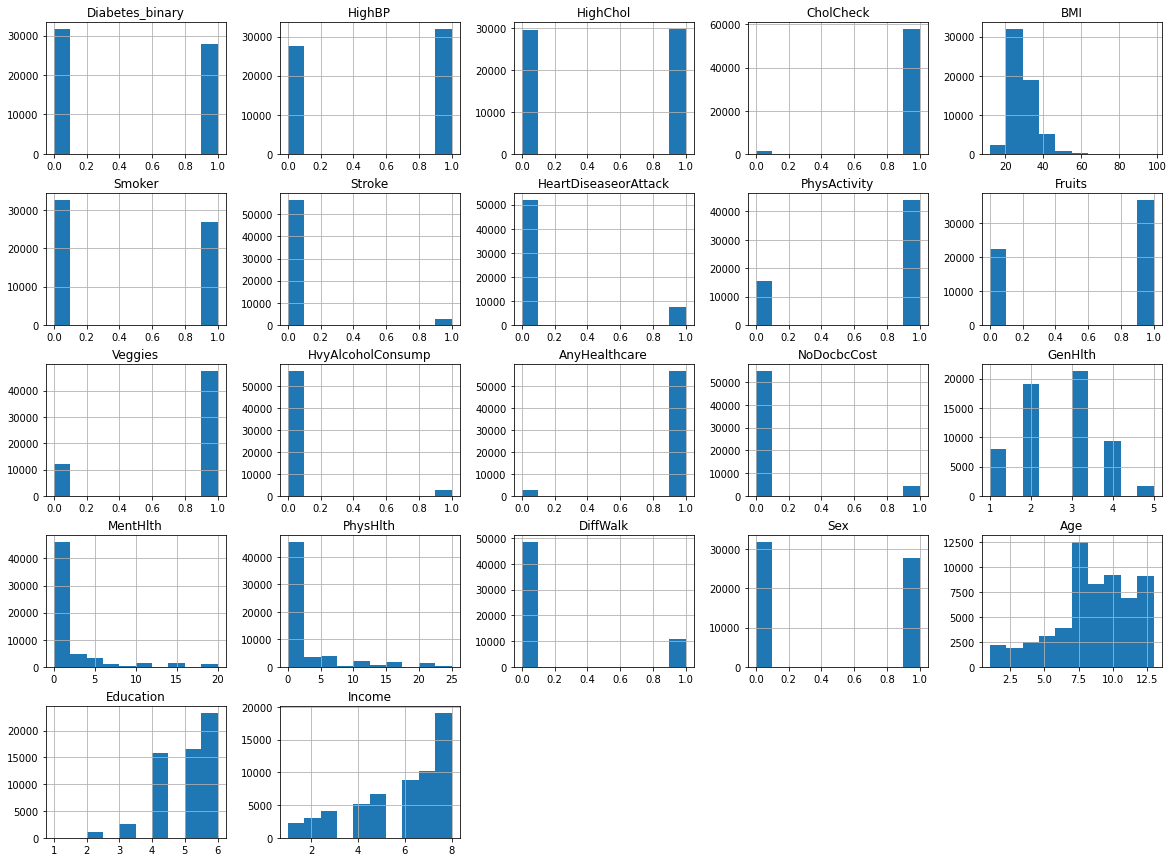

In [ ]:
data.hist(figsize=(20,15));

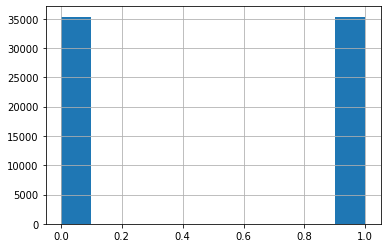

In [ ]:
#Python
hist = data['Diabetes_binary'].hist()

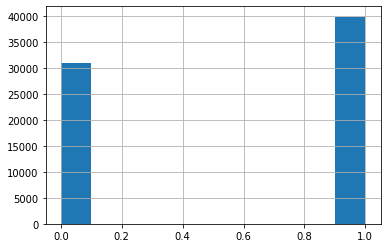

In [ ]:
#Python
hist = data['HighBP'].hist()

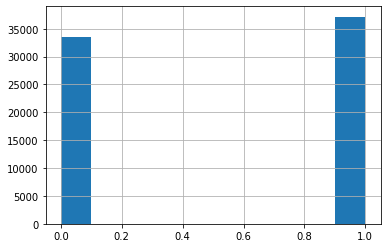

In [ ]:
#Python
hist = data['HighChol'].hist()

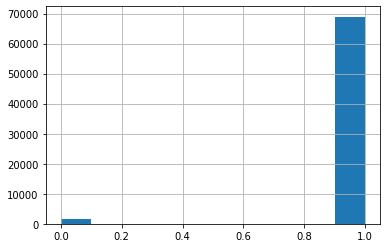

In [ ]:
#Python
hist = data['CholCheck'].hist()

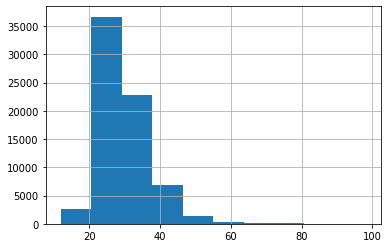

In [ ]:
#Python
hist = data['BMI'].hist()

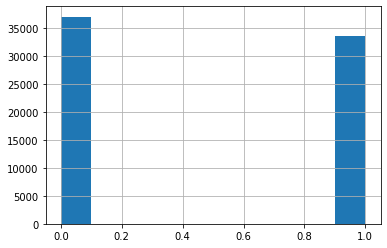

In [ ]:
#Python
hist = data['Smoker'].hist()

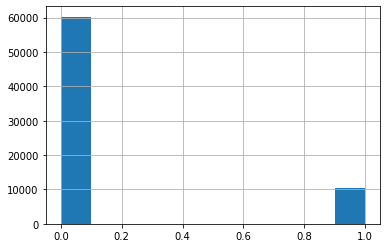

In [ ]:
#Python
hist = data['HeartDiseaseorAttack'].hist()

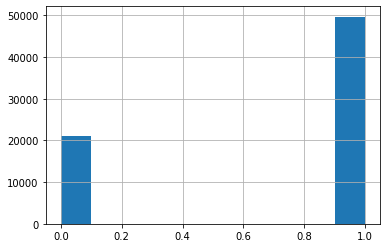

In [ ]:
#Python
hist = data['PhysActivity'].hist()

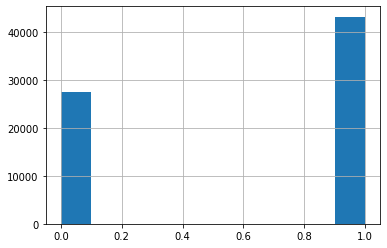

In [ ]:
#Python
hist = data['Fruits'].hist()

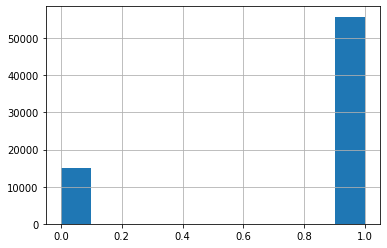

In [ ]:
#Python
hist = data['Veggies'].hist()

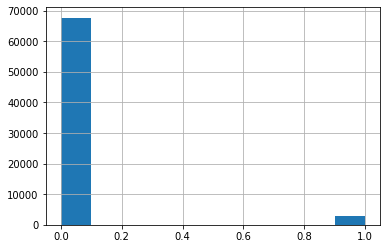

In [ ]:
#Python
hist = data['HvyAlcoholConsump'].hist()

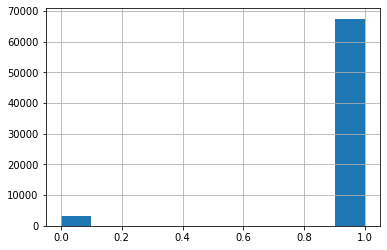

In [ ]:
#Python
hist = data['AnyHealthcare'].hist()

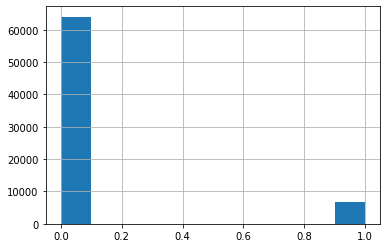

In [ ]:
#Python
hist = data['NoDocbcCost'].hist()

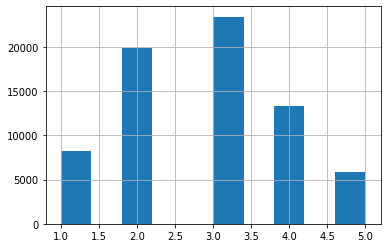

In [ ]:
#Python
hist = data['GenHlth'].hist()

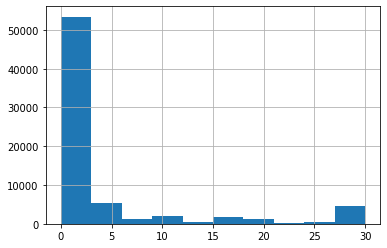

In [ ]:
#Python
hist = data['MentHlth'].hist()

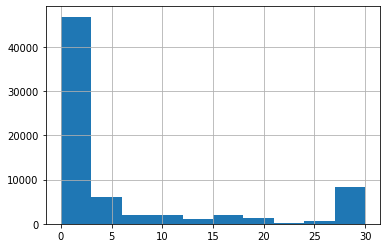

In [ ]:
#Python
hist = data['PhysHlth'].hist()

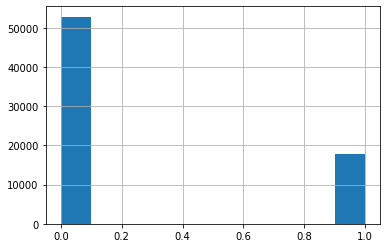

In [ ]:
#Python
hist = data['DiffWalk'].hist()

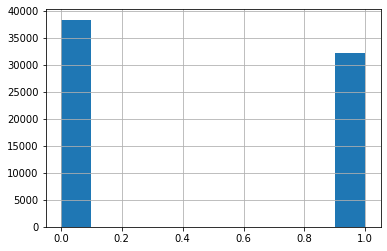

In [ ]:
#Python
hist = data['Sex'].hist()

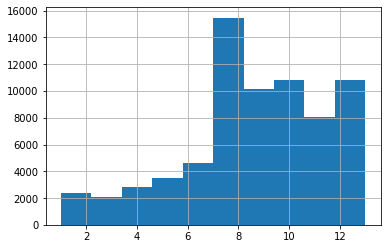

In [ ]:
#Python
hist = data['Age'].hist()

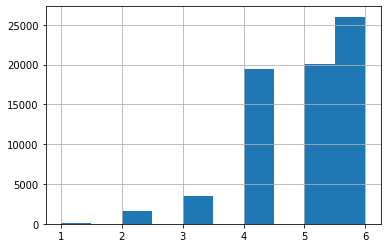

In [ ]:
#Python
hist = data['Education'].hist()

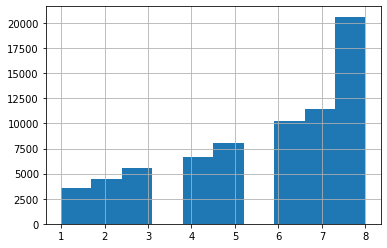

In [ ]:
#Python
hist = data['Income'].hist()

## **Estimación de densidad**


*   Otra forma de visualizar los datos.
*   Se usan técnicas estadísticas no paramétricas: estimación de densidad de **kernel**.
*   Versión suavizada del histograma, permite determinar si los datos observados se comportan como una densidad conocida.

En R se crea con el comando `density`, y se visualiza con el comando `plot`

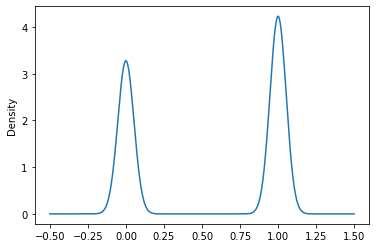

In [ ]:
ax = data['HighBP'].plot.kde()

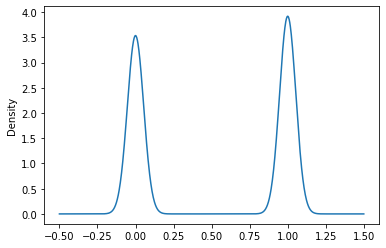

In [ ]:
ax = data['HighChol'].plot.kde()

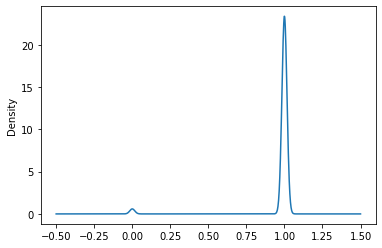

In [ ]:
ax = data['CholCheck'].plot.kde()

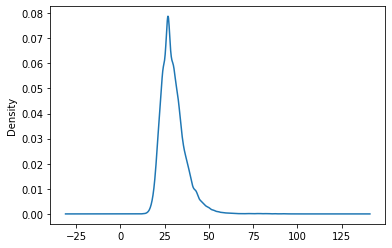

In [ ]:
ax = data['BMI'].plot.kde()

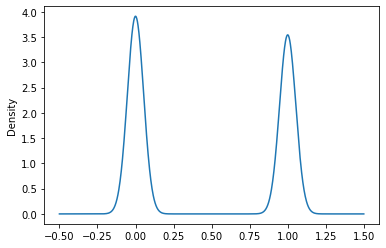

In [ ]:
ax = data['Smoker'].plot.kde()

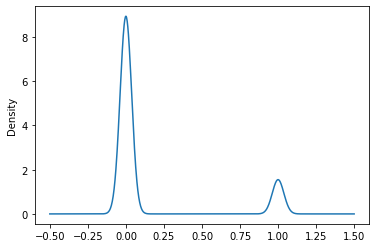

In [ ]:
ax = data['HeartDiseaseorAttack'].plot.kde()

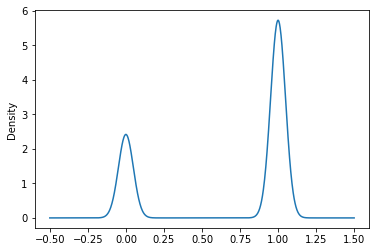

In [ ]:
ax = data['PhysActivity'].plot.kde()

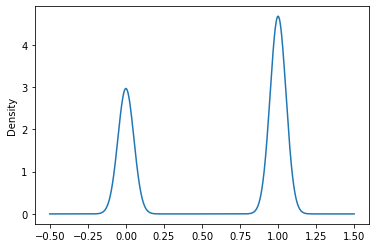

In [ ]:
ax = data['Fruits'].plot.kde()

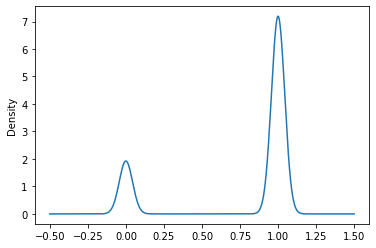

In [ ]:
ax = data['Veggies'].plot.kde()

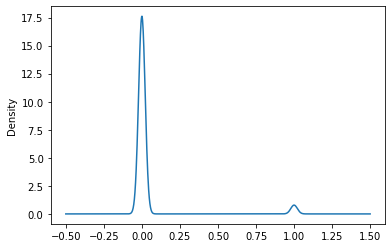

In [ ]:
ax = data['HvyAlcoholConsump'].plot.kde()

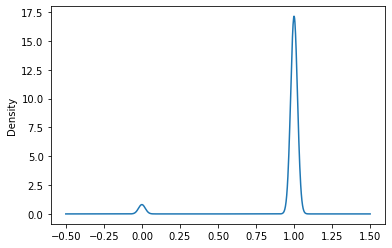

In [ ]:
ax = data['AnyHealthcare'].plot.kde()

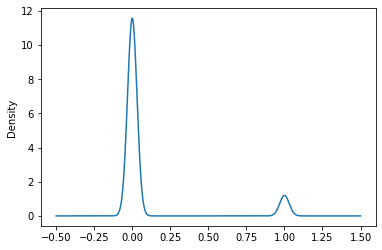

In [ ]:
ax = data['NoDocbcCost'].plot.kde()

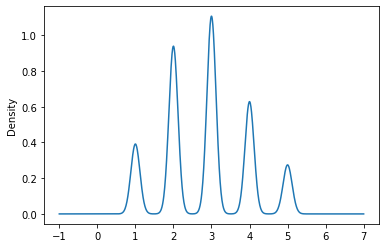

In [ ]:
ax = data['GenHlth'].plot.kde()

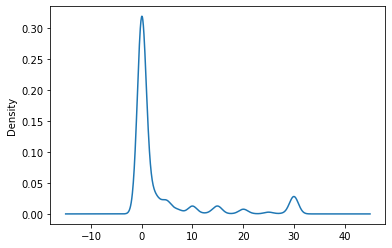

In [ ]:
ax = data['MentHlth'].plot.kde()

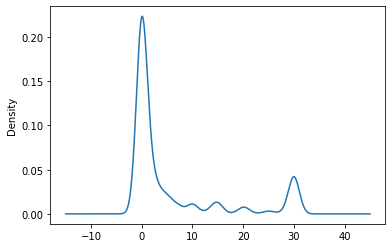

In [ ]:
ax = data['PhysHlth'].plot.kde()

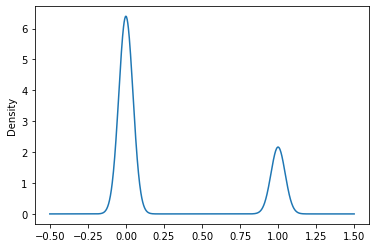

In [ ]:
ax = data['DiffWalk'].plot.kde()

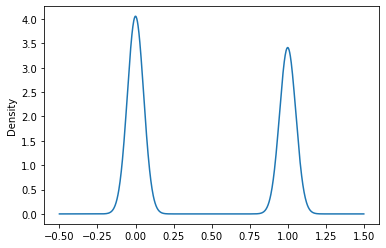

In [ ]:
ax = data['Sex'].plot.kde()

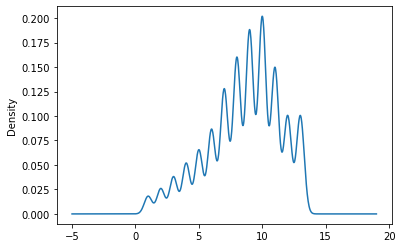

In [ ]:
ax = data['Age'].plot.kde()

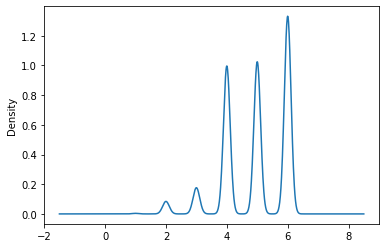

In [ ]:
ax = data['Education'].plot.kde()

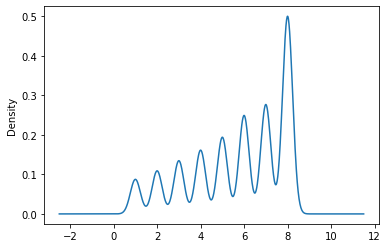

In [ ]:
ax = data['Income'].plot.kde()

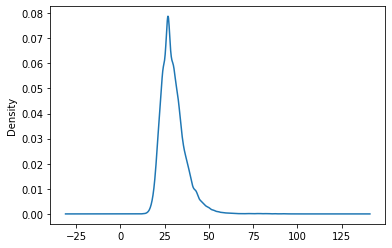

In [ ]:
ax = data['BMI'].plot.kde()

## **Diagramas de caja**

Se construyen a partir de los percentiles

En R se grafican con el comando `boxplot`

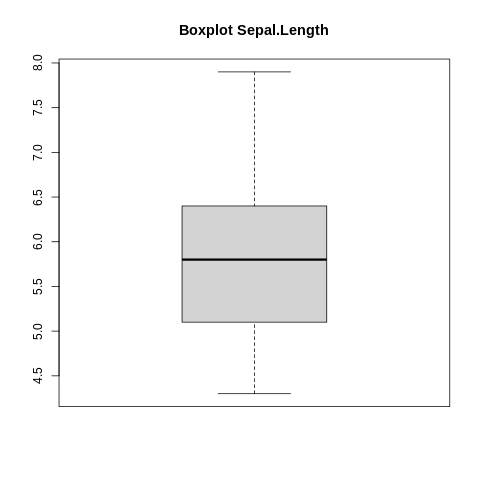

In [ ]:
# Lenguaje R
%%R
boxplot(iris$Sepal.Length,main="Boxplot Sepal.Length")

En R se pueden analizar varias variables al mismo tiempo:

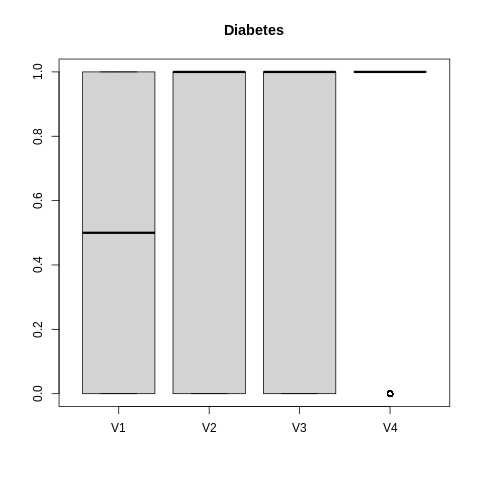

In [ ]:
# Lenguaje R
%%R
boxplot(x=data[,1:4],main="Diabetes")

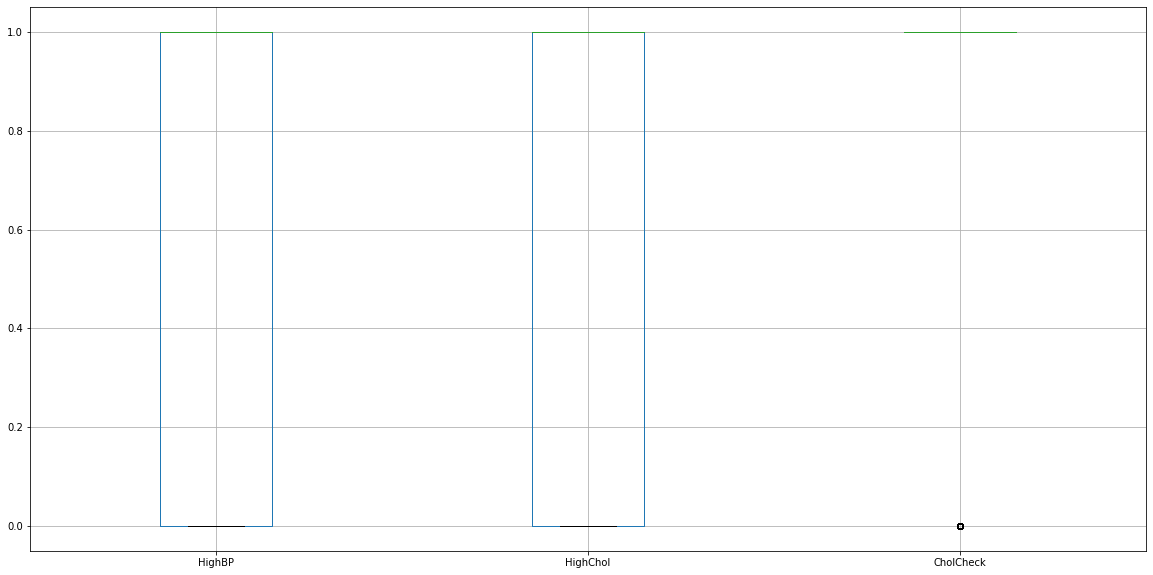

In [ ]:
import matplotlib.pyplot as plt

dt = data.iloc[:, [1,2,3]]
dt
plt.figure(figsize = (20,10)) 
dt.boxplot() 

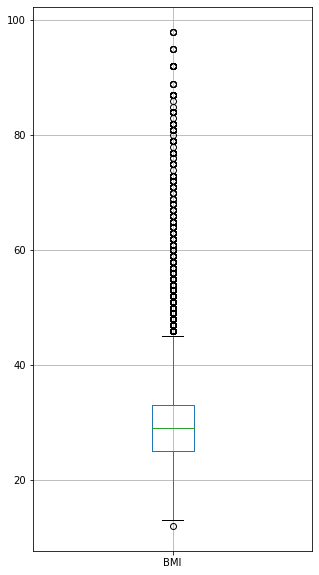

In [ ]:
dt = data.iloc[:, [4]]
dt
plt.figure(figsize = (5,10)) 
dt.boxplot() 

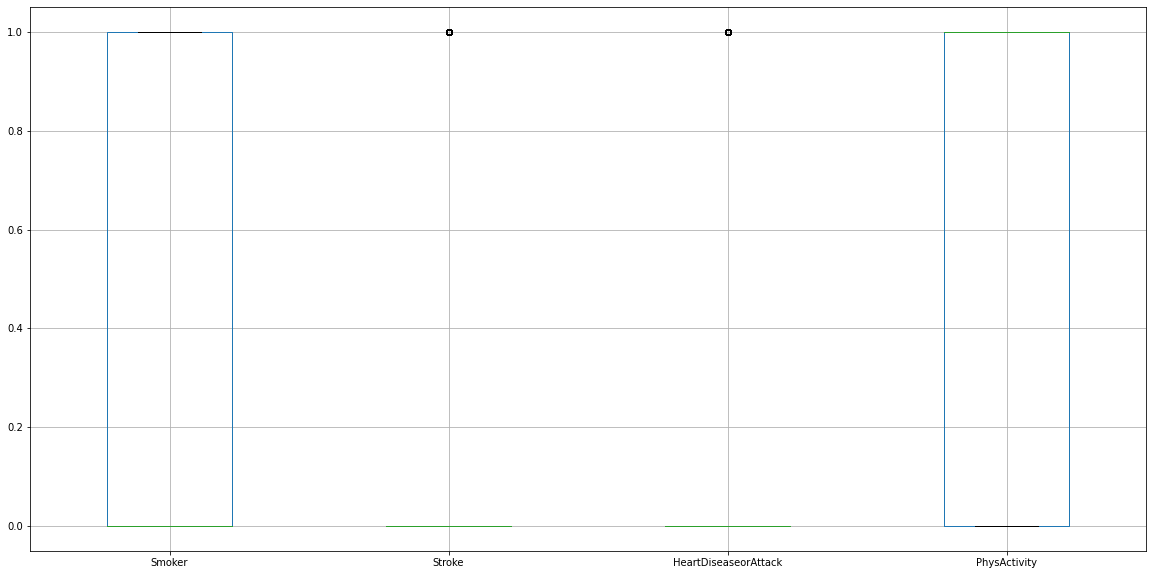

In [ ]:
dt = data.iloc[:, [5,6,7,8]]
dt
plt.figure(figsize = (20,10)) 
dt.boxplot() 

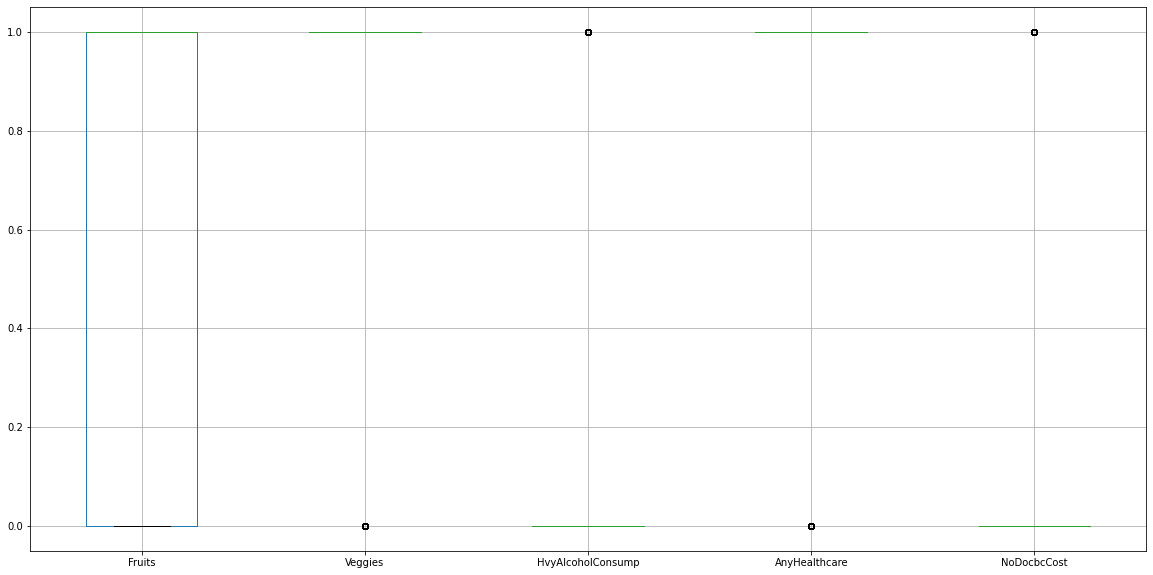

In [ ]:
dt = data.iloc[:, [9,10,11,12,13]]
dt
plt.figure(figsize = (20,10)) 
dt.boxplot() 

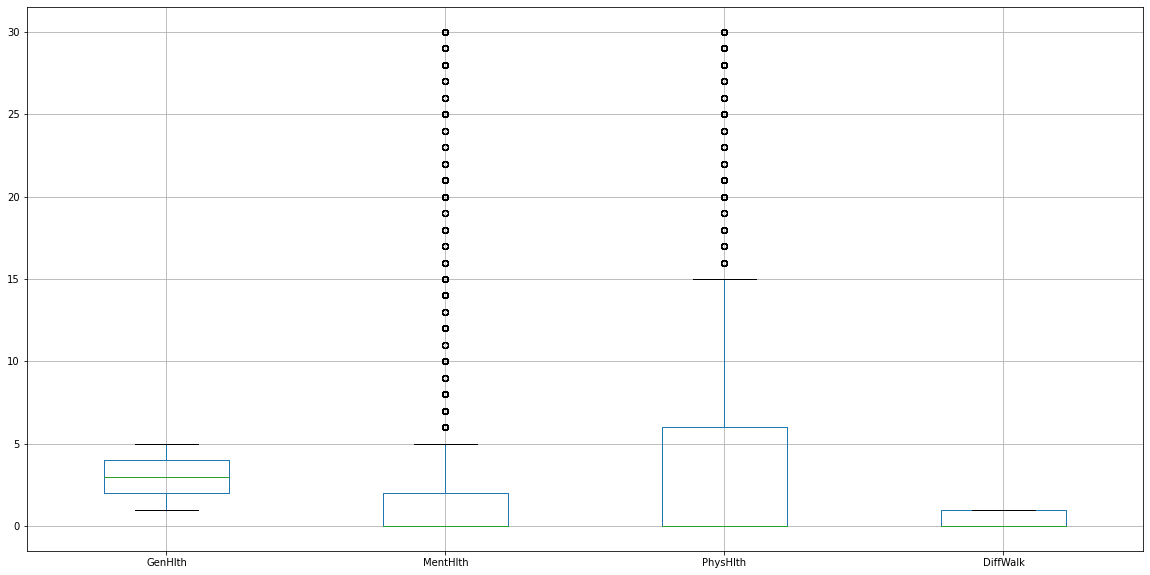

In [ ]:
dt = data.iloc[:, [14,15,16,17]]
dt
plt.figure(figsize = (20,10)) 
dt.boxplot() 

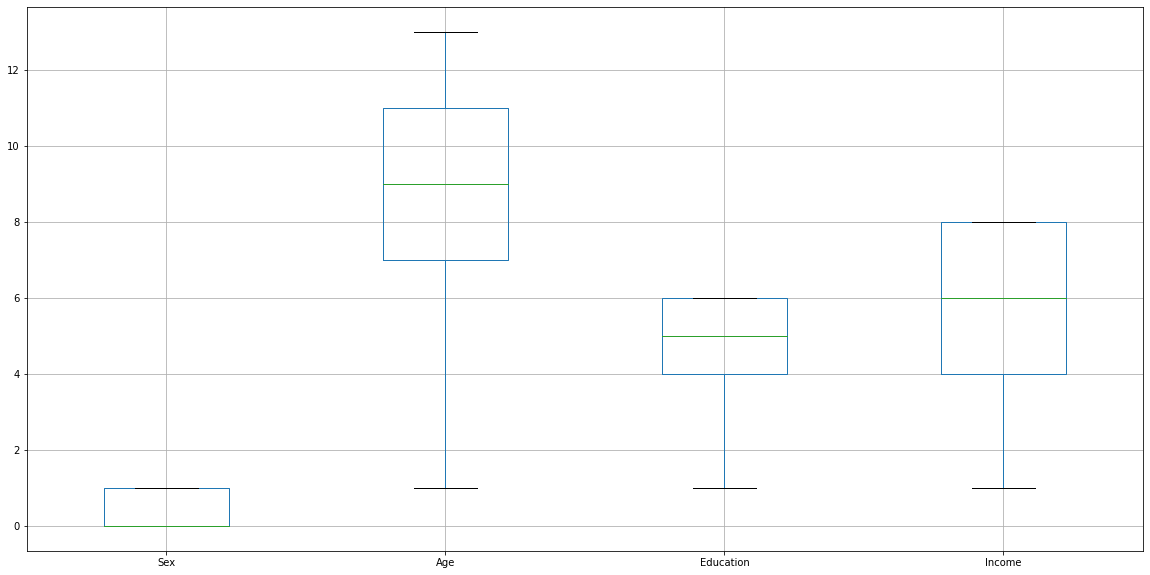

In [ ]:
dt = data.iloc[:, [18,19,20,21]]
dt
plt.figure(figsize = (20,10)) 
dt.boxplot() 

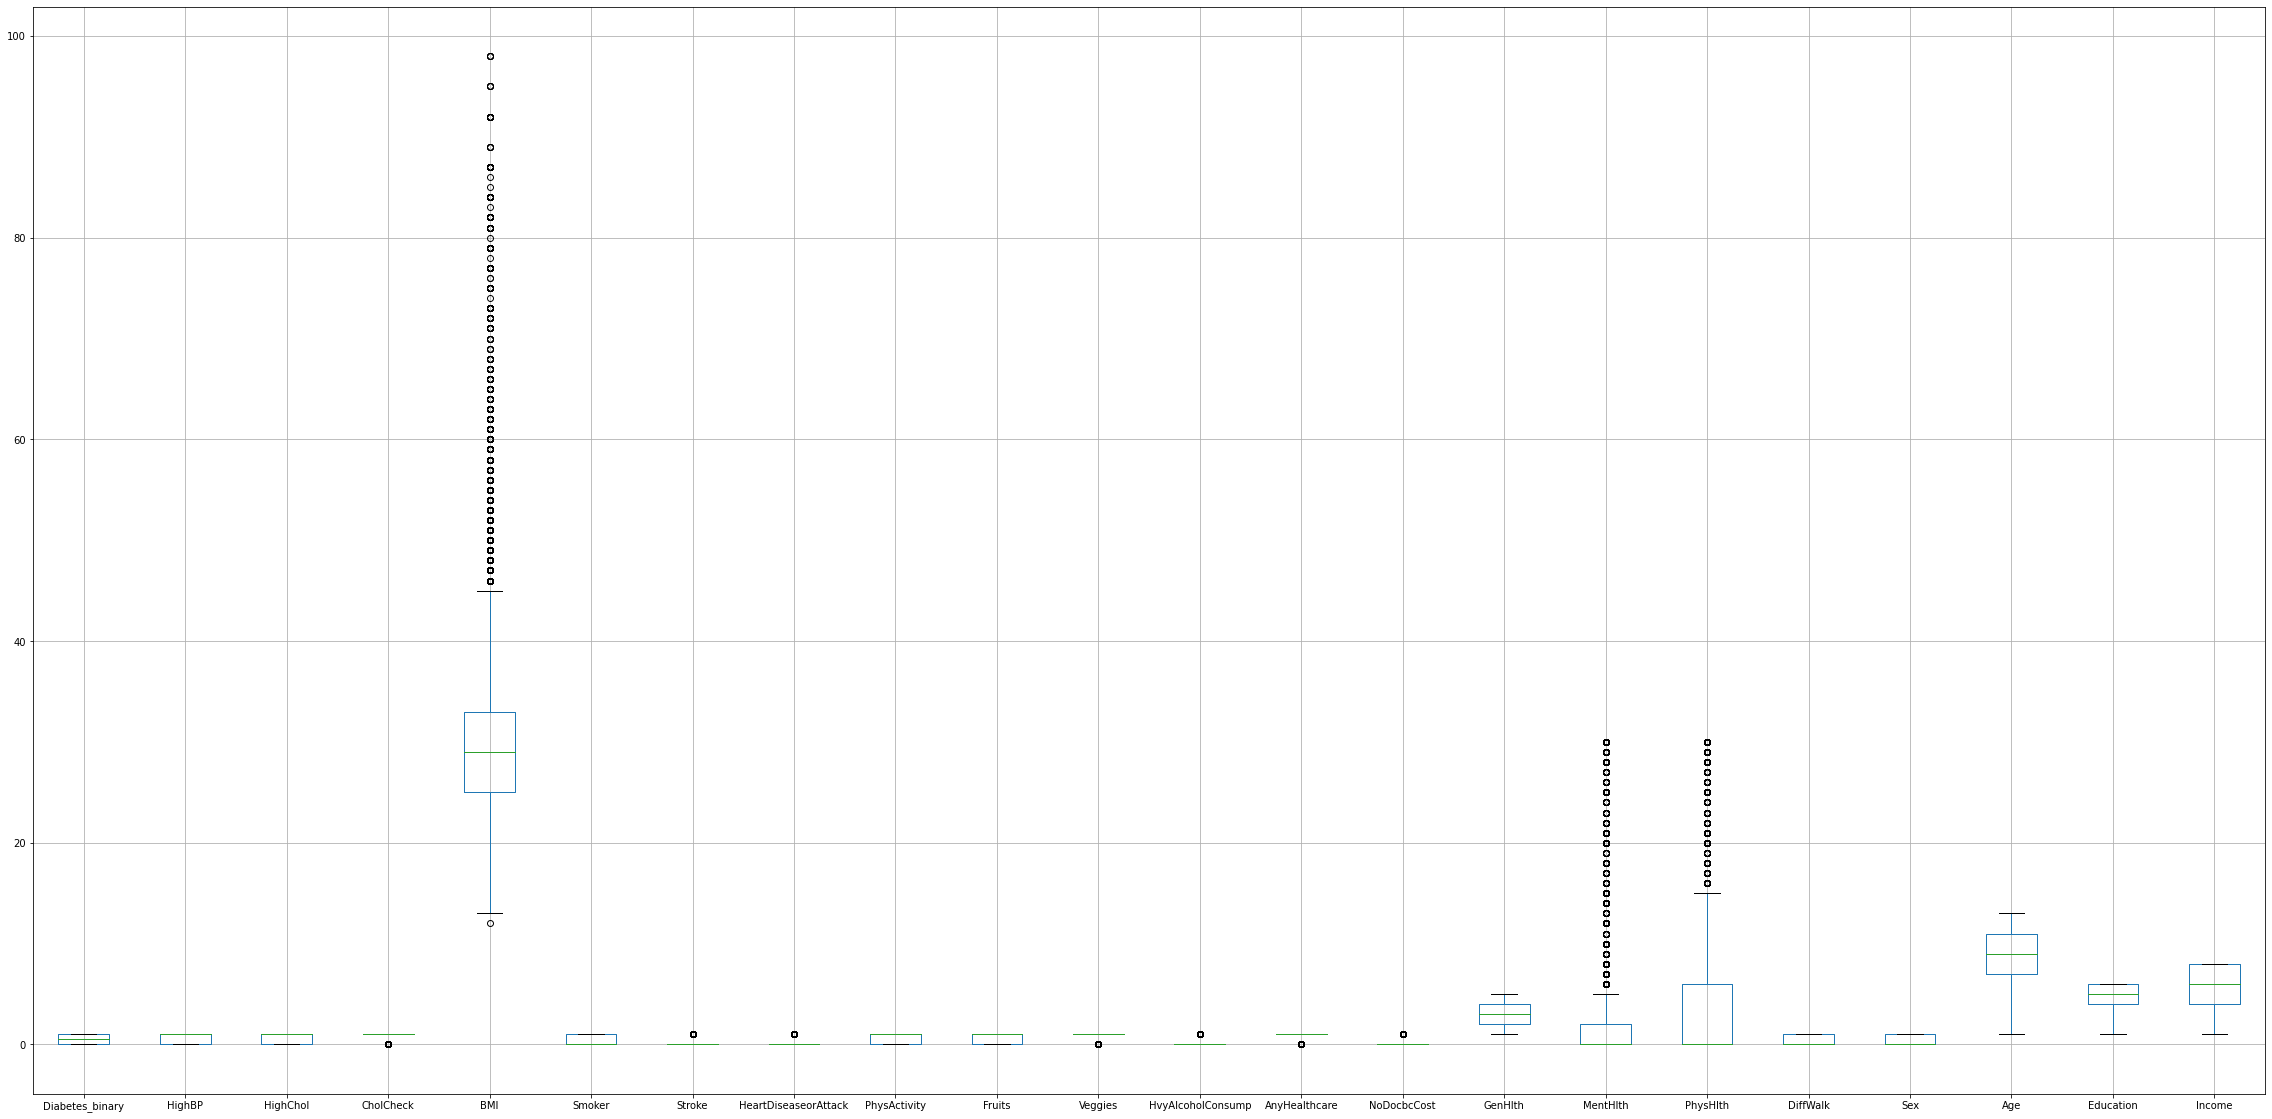

In [ ]:
#Python
import matplotlib.pyplot as plt 
plt.figure(figsize = (40,20)) 
data.boxplot() 

En R se puede crear un boxplot por cada ”clase” o categoría:

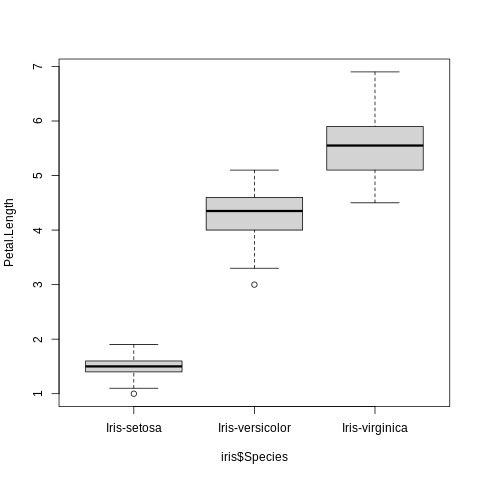

In [ ]:
# Lenguaje R
%%R
boxplot(iris$Petal.Length~iris$Species,ylab="Petal.Length")

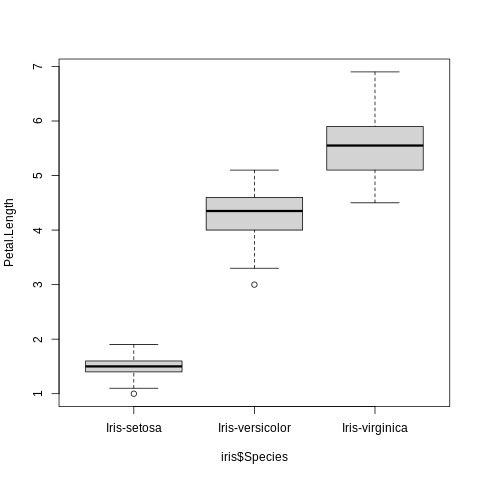

In [ ]:
# Lenguaje R
%%R
boxplot(iris$Petal.Length~iris$Species,ylab="Petal.Length")

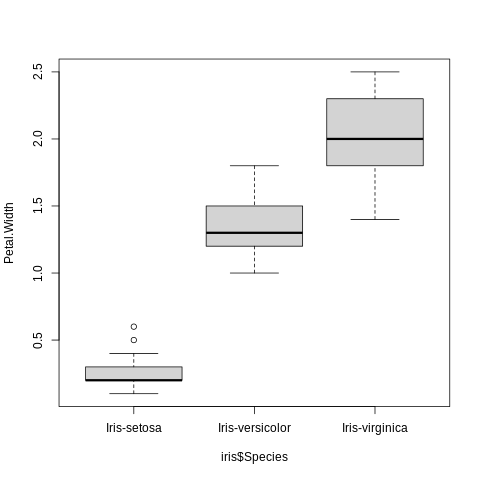

In [ ]:
# Lenguaje R
%%R
boxplot(iris$Petal.Width~iris$Species,ylab="Petal.Width")

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


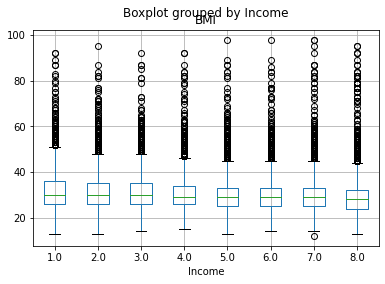

In [ ]:
#Python
data.boxplot(column='BMI',by='Income')


## **Diagramas de dispersión**

*    Los diagramas de dispersion o **scatter plots** usan coordenadas cartesianas para mostrar los valores de dos variables del mismo largo.
*    Los valores de los atributos determinan la posicion de los elementos. Se pueden usar atributos para definir tamaño, forma o color de los objetos.
*    En R se grafica un scatterplot de dos variables numéricas usando el comando `plot(x,y)`.
*    Scatterplots de data.frame o matriz numerica se implementan en R usando el comando `pairs(x)`.




In [ ]:
import seaborn as sns
g = sns.pairplot(data, hue="Diabetes_binary")


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7fda32134320> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
import matplotlib.pyplot as plt 

Text(0, 0.5, 'BMI')

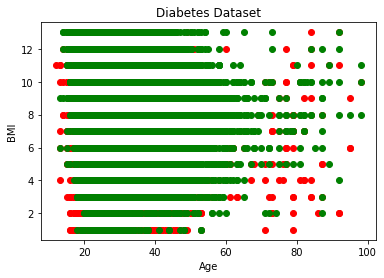

In [ ]:
#Python
colors = {0:'r', 1:'g'}
fig, ax = plt.subplots()
for i in range(len(data['BMI'])):
    ax.scatter(data['BMI'][i], data['Age'][i],color=colors[data['Diabetes_binary'][i]])
ax.set_title('Diabetes Dataset')
ax.set_xlabel('Age')
ax.set_ylabel('BMI')

Text(0.5, 0, 'HighChol')

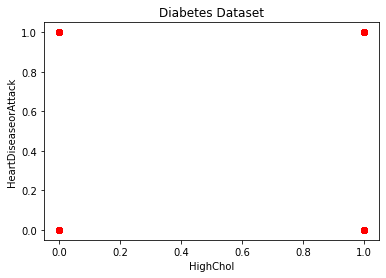

In [ ]:
colors = {0:'b', 1:'r'}
fig, ax = plt.subplots()
for i in range(len(data['HeartDiseaseorAttack'])):
    ax.scatter(data['HeartDiseaseorAttack'][i], data['HighChol'][i],color=colors[data['Diabetes_binary'][i]])
ax.set_title('Diabetes Dataset')
ax.set_ylabel('HeartDiseaseorAttack')
ax.set_xlabel('HighChol')

Text(0.5, 0, 'Income')

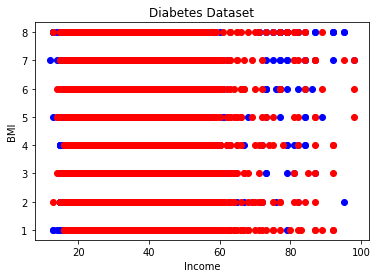

In [ ]:
colors = {0:'b', 1:'r'}
fig, ax = plt.subplots()
for i in range(len(data['BMI'])):
    ax.scatter(data['BMI'][i], data['Income'][i],color=colors[data['Diabetes_binary'][i]])
ax.set_title('Diabetes Dataset')
ax.set_ylabel('BMI')
ax.set_xlabel('Income')

Text(0.5, 0, 'PhysActivity')

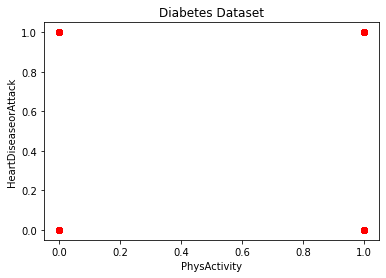

In [ ]:
colors = {0:'b', 1:'r'}
fig, ax = plt.subplots()
for i in range(len(data['HeartDiseaseorAttack'])):
    ax.scatter(data['HeartDiseaseorAttack'][i], data['PhysActivity'][i],color=colors[data['Diabetes_binary'][i]])
ax.set_title('Diabetes Dataset')
ax.set_ylabel('HeartDiseaseorAttack')
ax.set_xlabel('PhysActivity')

Text(0.5, 0, 'Sex')

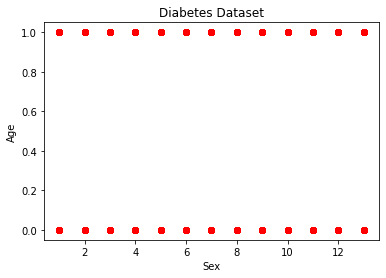

In [ ]:
colors = {0:'b', 1:'r'}
fig, ax = plt.subplots()
for i in range(len(data['Age'])):
    ax.scatter(data['Age'][i], data['Sex'][i],color=colors[data['Diabetes_binary'][i]])
ax.set_title('Diabetes Dataset')
ax.set_ylabel('Age')
ax.set_xlabel('Sex')

Text(0, 0.5, 'sepal_width')

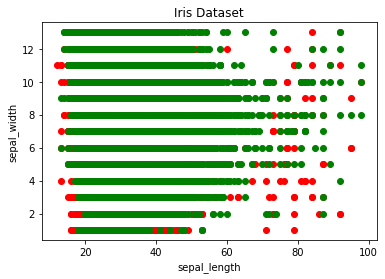

In [ ]:
#Python
colors = {0:'r', 1:'g'}
fig, ax = plt.subplots()
for i in range(len(data['BMI'])):
    ax.scatter(data['BMI'][i], data['Age'][i],color=colors[data['Diabetes_binary'][i]])
ax.set_title('Iris Dataset')
ax.set_xlabel('sepal_length')
ax.set_ylabel('sepal_width')

In [ ]:
#Python
import seaborn as sns
g = sns.pairplot(data, hue="BMI")

# **Preprocesamiento**

**outliers**

In [ ]:
# Python
data = pd.read_csv("./diabetes50.data", names=["Diabetes_binary", "HighBP", "HighChol", "CholCheck", "BMI", "Smoker", "Stroke", "HeartDiseaseorAttack", "PhysActivity", "Fruits", "Veggies", "HvyAlcoholConsump", "AnyHealthcare", "NoDocbcCost", "GenHlth", "MentHlth", "PhysHlth", "DiffWalk", "Sex" ,"Age" , "Education", "Income"]) 
data1 = pd.read_csv("./diabetes50.data", names=["Diabetes_binary", "HighBP", "HighChol", "CholCheck", "BMI", "Smoker", "Stroke", "HeartDiseaseorAttack", "PhysActivity", "Fruits", "Veggies", "HvyAlcoholConsump", "AnyHealthcare", "NoDocbcCost", "GenHlth", "MentHlth", "PhysHlth", "DiffWalk", "Sex" ,"Age" , "Education", "Income"]) 

In [ ]:
from numpy.lib.function_base import append
media = data.mean(axis = 0)
varianza = data.var()
desv_estandar = []
for i in range(len(varianza)):
  desv_estandar.append(np.sqrt(varianza[i]))
umbral_sup = []
umbral_inf = []

for i in range(len(desv_estandar)):
  umbral_sup.append(media[i] + (2 * desv_estandar[i]))
  umbral_inf.append(media[i] - (2 * desv_estandar[i]))

In [ ]:
umbral_sup

[1.5000070730111579,
 1.555378769163609,
 1.5243879459027263,
 1.2859313550700233,
 44.08489293486307,
 1.4740564835556902,
 0.5451066592059641,
 0.8576387617019869,
 1.616883516883453,
 1.5864850890013513,
 1.6051365704485616,
 0.4471760625850463,
 1.3697482738892282,
 0.6773378816831109,
 5.064211023554545,
 20.0632901128179,
 25.934938082641253,
 1.1218913455880264,
 1.4532981362989181,
 14.288360992719983,
 6.979114466923255,
 10.048702934691923]

In [ ]:
umbral_inf

[-0.5000070730111579,
 -0.42846200347583674,
 -0.47298184620261885,
 0.6645863838537587,
 15.629077528555705,
 -0.5235104528874392,
 -0.4207644422648675,
 -0.5620183237457825,
 -0.21081210852041332,
 -0.36289543246312916,
 -0.027588898859131517,
 -0.3617349942887751,
 0.5401708117215908,
 -0.48950899015365923,
 0.6099529553963965,
 -12.55921610161437,
 -14.314104042014307,
 -0.6164310389055164,
 -0.5393050394845684,
 2.8797485529145987,
 2.8627912649841747,
 1.347919031018483]

In [ ]:
data_clean = len(data.index)
print('Datos iniciales',data_clean)

Datos iniciales 70692


In [ ]:

data = data.drop(data[(data.MentHlth > umbral_sup[15])].index)  
data_MentHlth = len(data.index)
print('Cantidad de datos despues de liminar outliers superiores de MentHlth',data_MentHlth)

Cantidad de datos despues de liminar outliers superiores de MentHlth 65632


In [ ]:

data = data.drop(data[(data.PhysHlth > umbral_sup[16])].index)
data_PhysHlth = len(data.index)
print('Cantidad de datos despues de liminar outliers superiores de  PhysHlth',data_PhysHlth)

Cantidad de datos despues de liminar outliers superiores de  PhysHlth 59541


In [ ]:
print('Datos eliminados en MentHlth', data_clean-data_MentHlth)
print('Datos eliminados en PhysHlth', data_MentHlth-data_PhysHlth)
print('Total datos elimnados',data_clean-data_MentHlth + data_MentHlth-data_PhysHlth)
data

Datos eliminados en MentHlth 5060
Datos eliminados en PhysHlth 6091
Total datos elimnados 11151


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
5,0.0,0.0,0.0,1.0,18.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,2.0,7.0,0.0,0.0,0.0,1.0,4.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


**Muestreo**
Se usa el muestreo con reemplazo para evitar datos duplicados, se usa la cuarta parte del conjunto de datos original verificando que las clases y sus respectivas dimensiones no cambien demasiado

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
22441,0.0,0.0,1.0,1.0,33.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,2.0,14.0,0.0,0.0,9.0,5.0,4.0
22483,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,6.0,6.0,8.0
23526,0.0,0.0,0.0,1.0,25.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,9.0,6.0,8.0
17944,0.0,1.0,1.0,1.0,27.0,1.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,20.0,14.0,0.0,0.0,8.0,6.0,3.0
16223,0.0,1.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,9.0,6.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4947,0.0,1.0,1.0,1.0,31.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,20.0,1.0,1.0,11.0,5.0,7.0
66771,1.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,4.0,0.0,20.0,0.0,0.0,8.0,5.0,8.0
45985,1.0,1.0,0.0,1.0,42.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,2.0,16.0,1.0,1.0,6.0,5.0,1.0
31477,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,5.0,0.0,0.0,1.0,8.0,5.0,7.0


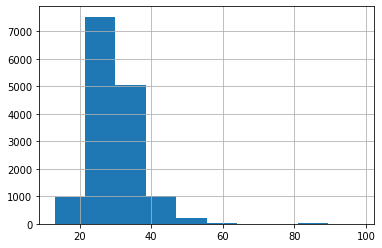

In [ ]:
data_sample = data.sample(n=int(len(data)/4), replace=True)
hist = data_sample['BMI'].hist()
data_sample


In [ ]:
from google.colab import files
data2 = data_sample.reset_index()
data2 = data2.drop(columns=['index'])
data2



,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0.0,1.0,1.0,33.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,2.0,14.0,0.0,0.0,9.0,5.0,4.0
1,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,6.0,6.0,8.0
2,0.0,0.0,0.0,1.0,25.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,9.0,6.0,8.0
3,0.0,1.0,1.0,1.0,27.0,1.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,20.0,14.0,0.0,0.0,8.0,6.0,3.0
4,0.0,1.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,9.0,6.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14880,0.0,1.0,1.0,1.0,31.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,20.0,1.0,1.0,11.0,5.0,7.0
14881,1.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,4.0,0.0,20.0,0.0,0.0,8.0,5.0,8.0
14882,1.0,1.0,0.0,1.0,42.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,2.0,16.0,1.0,1.0,6.0,5.0,1.0
14883,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,5.0,0.0,0.0,1.0,8.0,5.0,7.0


In [ ]:
from pandas._libs.hashtable import value_count
import pandas as pd

bins = pd.qcut(data2['BMI'],4)
bins.value_counts(sort=False)


(12.999, 25.0]    4167
(25.0, 28.0]      3492
(28.0, 33.0]      3998
(33.0, 98.0]      3228
Name: BMI, dtype: int64

In [ ]:
# Applying the condition
data2.loc[(data2["BMI"] > 12.999) & (data2["BMI"] <= 25.0), "BMI"] = 0
data2.loc[(data2["BMI"] > 25.0) & (data2["BMI"] <= 28.0), "BMI"] = 1
data2.loc[(data2["BMI"] > 28.0) & (data2["BMI"] <= 32.0), "BMI"] = 2
data2.loc[(data2["BMI"] > 32.0) & (data2["BMI"] <= 89.0), "BMI"] = 3
data2

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0.0,1.0,1.0,3.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,2.0,14.0,0.0,0.0,9.0,5.0,4.0
1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,6.0,6.0,8.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,9.0,6.0,8.0
3,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,20.0,14.0,0.0,0.0,8.0,6.0,3.0
4,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,9.0,6.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14880,0.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,20.0,1.0,1.0,11.0,5.0,7.0
14881,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,4.0,0.0,20.0,0.0,0.0,8.0,5.0,8.0
14882,1.0,1.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,2.0,16.0,1.0,1.0,6.0,5.0,1.0
14883,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,5.0,0.0,0.0,1.0,8.0,5.0,7.0


In [ ]:
import dataclasses
from inspect import cleandoc
from numpy.lib.function_base import append
noDiab = data2.iloc[[]]
Diab = data2.iloc[[],]

one_column = data2.iloc[:, [4]]
for i in range(len(one_column)):
  if data2['Diabetes_binary'][i] == 0:
    noDiab = pd.concat([noDiab,data2.iloc[[i],]])
  elif data2['Diabetes_binary'][i] == 1:
    Diab = pd.concat([Diab,data2.iloc[[i],]])

SE_noDiab = np.sqrt(((noDiab.var())/len(noDiab)) + ((Diab.var())/len(Diab)))
T_noDiab = np.absolute(noDiab.mean(axis = 0)-Diab.mean(axis = 0))/SE_noDiab
SE_noDiab



Diabetes_binary         0.000000
HighBP                  0.007549
HighChol                0.007870
CholCheck               0.002443
BMI                     0.026120
Smoker                  0.008149
Stroke                  0.003623
HeartDiseaseorAttack    0.005512
PhysActivity            0.007188
Fruits                  0.007984
Veggies                 0.006640
HvyAlcoholConsump       0.003214
AnyHealthcare           0.003287
NoDocbcCost             0.004516
GenHlth                 0.015159
MentHlth                0.064422
PhysHlth                0.082212
DiffWalk                0.006401
Sex                     0.008190
Age                     0.044326
Education               0.016441
Income                  0.033449
dtype: float64

In [ ]:
T_noDiab


Diabetes_binary               inf
HighBP                  49.956124
HighChol                35.903673
CholCheck               14.838655
BMI                     29.505740
Smoker                  10.666551
Stroke                  12.476416
HeartDiseaseorAttack    23.522534
PhysActivity            17.225090
Fruits                   6.671361
Veggies                 10.520070
HvyAlcoholConsump       13.465169
AnyHealthcare            1.591224
NoDocbcCost              3.632408
GenHlth                 54.056037
MentHlth                 4.226608
PhysHlth                18.390587
DiffWalk                31.184261
Sex                      7.985245
Age                     39.020768
Education               22.377026
Income                  29.337794
dtype: float64

In [ ]:
for i in range(len(T_noDiab)):
  if T_noDiab[i] < 16:
    data2 = data2.drop(T_noDiab.axes[0][i], axis=1)

data2

,Diabetes_binary,HighBP,HighChol,BMI,HeartDiseaseorAttack,PhysActivity,GenHlth,PhysHlth,DiffWalk,Age,Education,Income
0,0.0,0.0,1.0,3.0,0.0,0.0,3.0,14.0,0.0,9.0,5.0,4.0
1,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,6.0,6.0,8.0
2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,9.0,6.0,8.0
3,0.0,1.0,1.0,1.0,1.0,1.0,2.0,14.0,0.0,8.0,6.0,3.0
4,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,9.0,6.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...
14880,0.0,1.0,1.0,2.0,0.0,1.0,3.0,20.0,1.0,11.0,5.0,7.0
14881,1.0,1.0,1.0,1.0,0.0,1.0,4.0,20.0,0.0,8.0,5.0,8.0
14882,1.0,1.0,0.0,3.0,0.0,0.0,4.0,16.0,1.0,6.0,5.0,1.0
14883,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,8.0,5.0,7.0


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

data3 = StandardScaler().fit_transform(data2)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data3)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf

,principal component 1,principal component 2
0,0.939719,1.505197
1,-2.932429,0.093514
2,-2.781764,-0.262386
3,0.986254,-0.505743
4,-2.010549,-1.025007
...,...,...
14880,1.919978,0.273940
14881,1.624465,-0.277340
14882,3.361017,2.782740
14883,-2.356586,0.386868


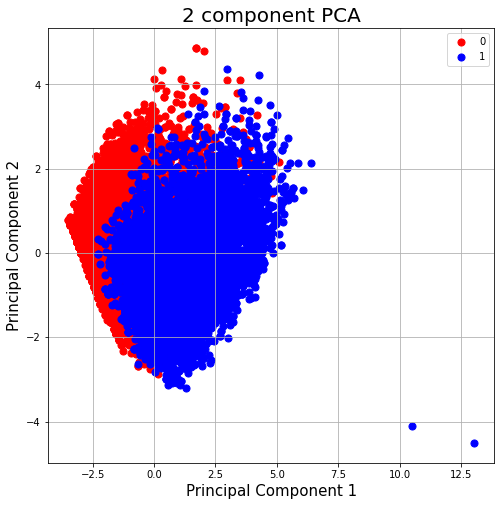

In [ ]:
import matplotlib.pyplot as plt

finalDf = pd.concat([principalDf, data2[['Diabetes_binary']]], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Diabetes_binary'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

---
**REFERENCIAS**

*   Documentación  de Pandas. https://pandas.pydata.org/
*   Documentación de matplotlib. https://matplotlib.org/
*   Bravo, F. (2013). Análisis exploratorio en R
*   Diapositivas clase
*   Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

---





